# Stock Market Prediction Model based on Date features

In this project, I have made a NEPSE close predictor based on the Dates feature. I will explain the details step by step in the cells below.

# Importing and Checking the Data set

In this section, I imported required packages and NEPSE close data from an excel file. I took only date and Close column as they are the only required vaiable for this project. Further, I visualized the complete data set to see the trend of NEPSE close from 2012-12-26.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import datetime
#from datetime import datetime
from sklearn.metrics import mean_squared_error,accuracy_score,r2_score
from sklearn.model_selection import train_test_split

datetime64[ns]


,Close
Date,
2023-02-05,2096.08
2023-02-02,2094.54
2023-02-01,2116.65
2023-01-31,2111.68
2023-01-30,2127.52


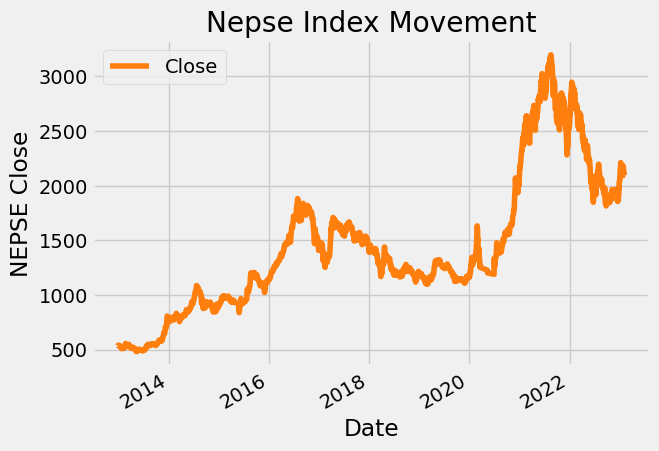

In [2]:
s = 8
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')
df = pd.read_excel('NEPSE.xlsx',parse_dates=True,skiprows=0,index_col='Date')
print(df.index.dtype)
df = df[['Close']]
df.plot(color = color_pal[1])
plt.title('Nepse Index Movement')
plt.ylabel('NEPSE Close')
df.head()

In [3]:
#train = df.loc[df.index < '01-01-2018']
#test = df.loc[df.index >= '01-01-2018']
#fig,ax=plt.subplots()
#train.plot(ax=ax)
#test.plot(ax=ax)
#plt.title('Index by train test')
#plt.show()

# Features Creation Function

I created a function which would create 5 different date variables from the dates in the data. Year, day of week, quarter, day and month may be important features and have influence in NEPSE close value. I visualized the top 5 rows to see if the features are created.

In [4]:
def create_features(df):
    df=df.copy()
    df['year']=df.index.year
    df['day_of_week']=df.index.dayofweek
    df['quarter']=df.index.quarter
    df['day']=df.index.day
    df['month']=df.index.month
    return df
df_n = create_features(df)
df_n.head()

,Close,year,day_of_week,quarter,day,month
Date,,,,,,
2023-02-05,2096.08,2023,6,1,5,2
2023-02-02,2094.54,2023,3,1,2,2
2023-02-01,2116.65,2023,2,1,1,2
2023-01-31,2111.68,2023,1,1,31,1
2023-01-30,2127.52,2023,0,1,30,1


# Feature to Target relationship

In this section I explored the relationship between the features and our target variables.Each relations are briefly explained below: 

1. We can see that the NEPSE index values are related to the day of month. Nepse index tend to be highest in 20th and 27th day of the month. 

2. There is also influence of year in the index value and the influence of year is the most compared to other features.

3. On November the index value tends to be maximum followed by month of may. There is a relationship between months and the NEPSE index value.

4. As we can see day of week doesnt seem to have so much influence in the NEPSE index Value except on friday. With domain knowledge of this sector, I know it is because SEBON made rule of operating stock market on fridays in 2022 in which time frame the index value of NEPSE was already too high. So, the influence of friday seen from the box plot is irelevant.

5. Finally, we can see that there is little effect of quarter of year. In second quarter NEPSE index Value tends to be a little higher compared to other quarters.



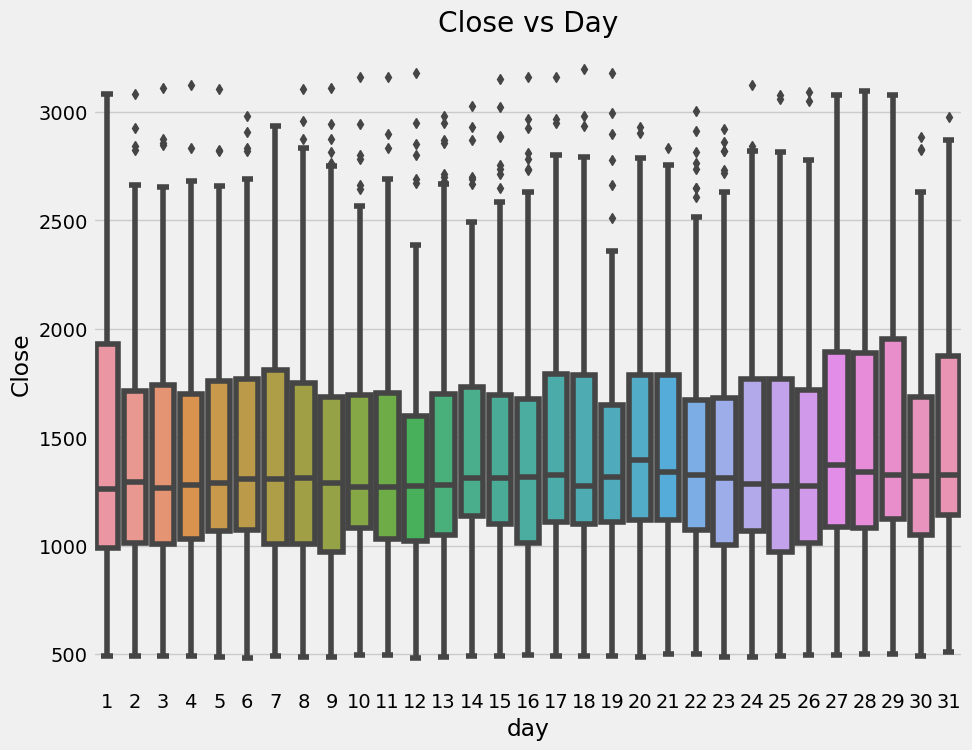

In [5]:
fig,ax =plt.subplots(figsize=(10,8))
sns.boxplot(data=df_n,x='day',y='Close')
ax.set_title('Close vs Day')
plt.show()

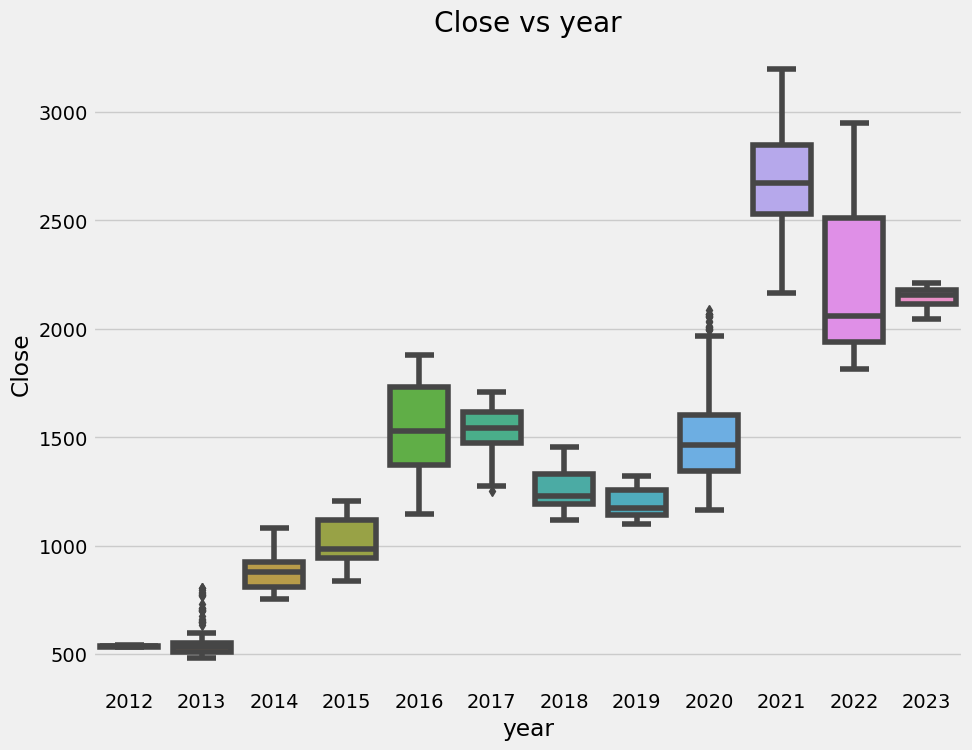

In [6]:
df_n = create_features(df)
fig,ax =plt.subplots(figsize=(10,8))
sns.boxplot(data=df_n,x='year',y='Close')
ax.set_title('Close vs year')
plt.show()

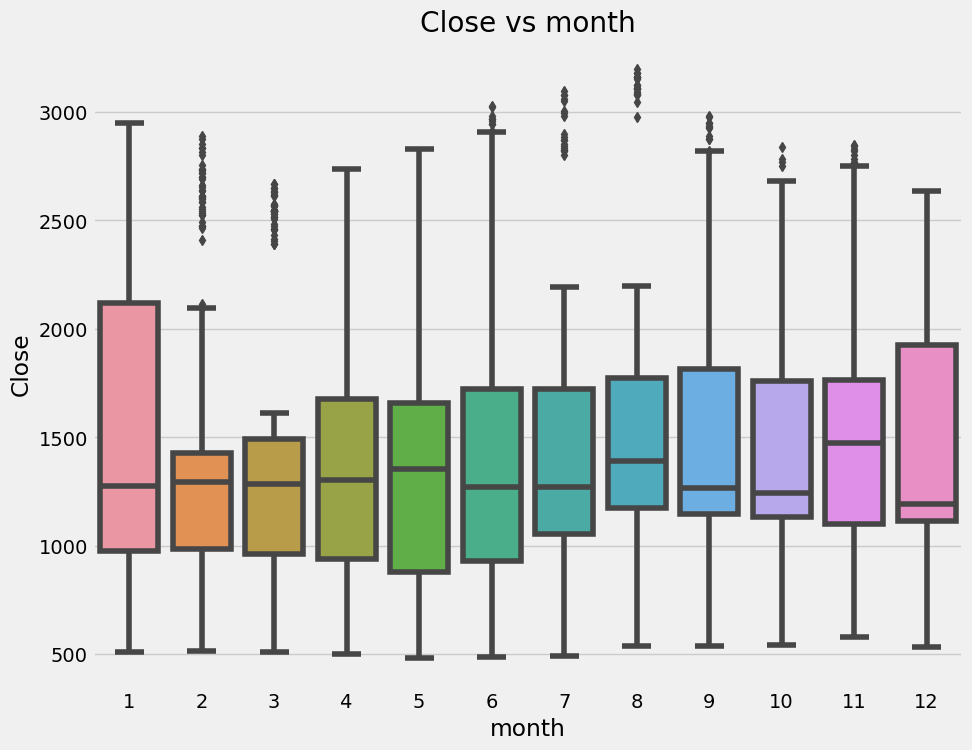

In [7]:
fig,ax =plt.subplots(figsize=(10,8))
sns.boxplot(data=df_n,x='month',y='Close')
ax.set_title('Close vs month')
plt.show()

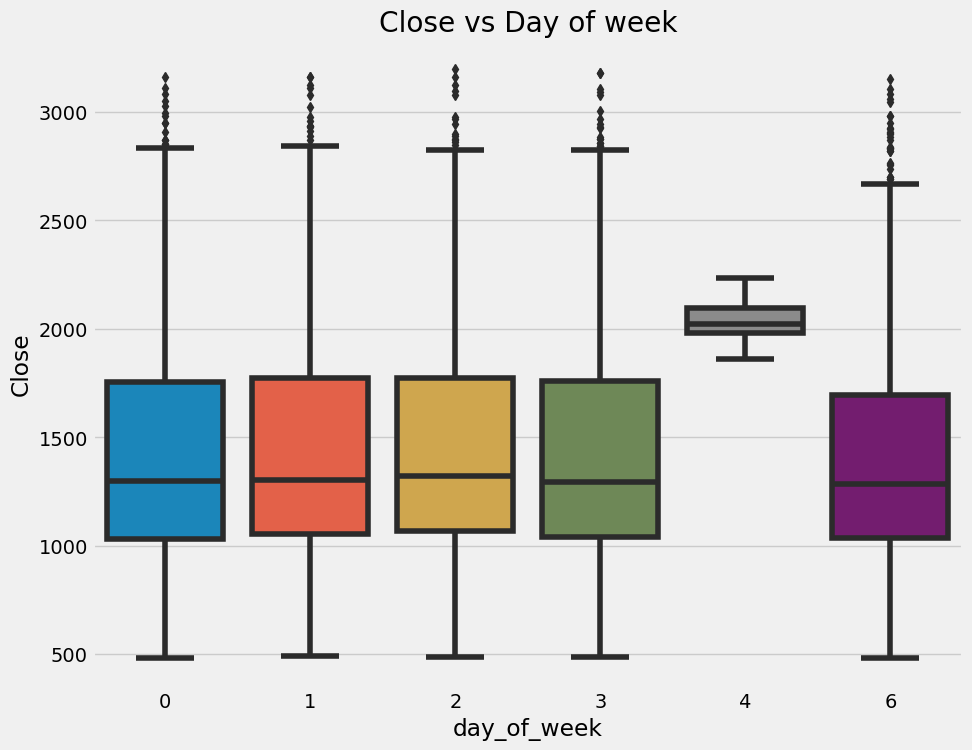

In [8]:
fig,ax =plt.subplots(figsize=(10,8))
sns.boxplot(data=df_n,x='day_of_week',y='Close')
ax.set_title('Close vs Day of week')
plt.show()

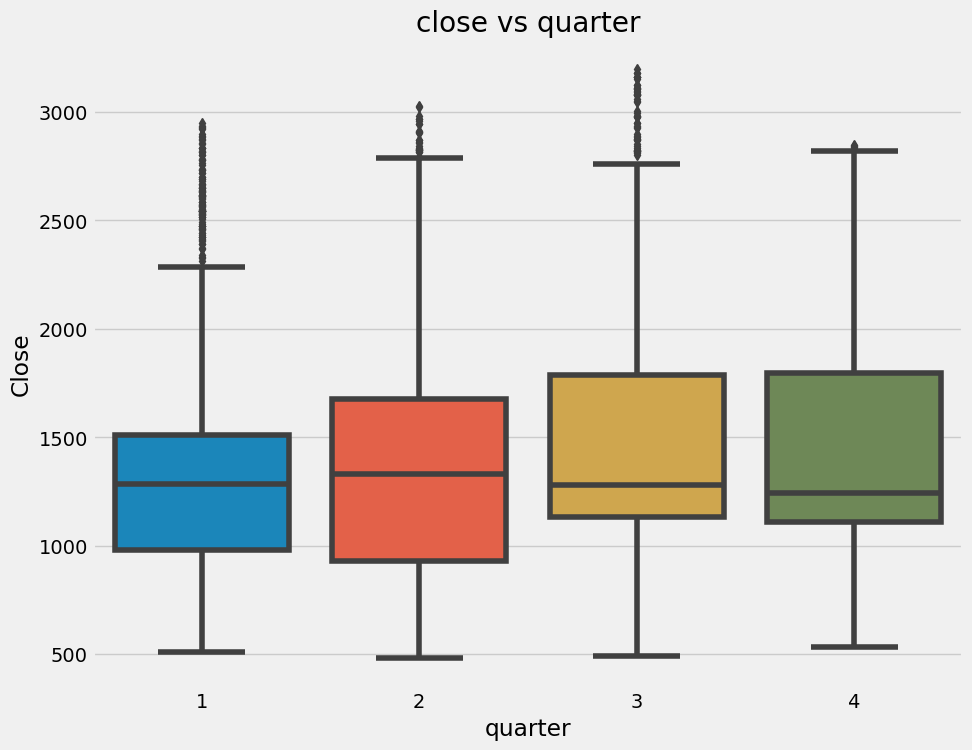

In [9]:
fig,ax =plt.subplots(figsize=(10,8))
sns.boxplot(data=df_n,x='quarter',y='Close')
ax.set_title('close vs quarter')
plt.show()

# Preprocessing Data and Running the Model

In this section I divided the target variable and the features variables into two different data frames. I ran two diferent machine learning algorithms and selected XGB boost which has a good R^2 value of 0.996. I also extracted feature importances and found year as the most important feature.

In [10]:
#train =create_features(train)
#test=create_features(test)
X=df_n.drop('Close',axis=1)
y=df_n['Close']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=s)

[09:55:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "early_stoping_rounds", "n_estimator" } are not used.

The score for XGBoost is 0.9966807558211577
The score for RandomForest is 0.997987774821555


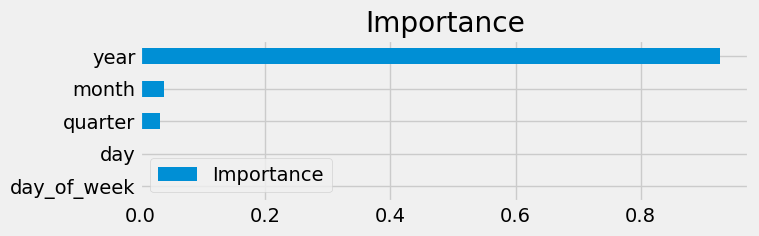

In [11]:
reg_XGB=xgb.XGBRegressor(n_estimator=1000,early_stoping_rounds=50,random_state=s)
reg_RF=RandomForestRegressor(random_state=s)
reg_XGB.fit(X_train,y_train)
reg_RF.fit(X_train,y_train)
y_pred_xgb=reg_XGB.predict(X_test)
y_pred_RF=reg_RF.predict(X_test)
print('The score for XGBoost is {}'.format(reg_XGB.score(X_test,y_test)))
print('The score for RandomForest is {}'.format(reg_RF.score(X_test,y_test)))
d=pd.DataFrame(index=reg_XGB.feature_names_in_,data=reg_XGB.feature_importances_,columns=['Importance']).sort_values('Importance')
d.plot(kind='barh',figsize=(7,2))
plt.title('Importance')
plt.show()





# Predictions of Model and Actual Index Value Visual Presentation

In this section, I predicted the NEPSE index Value and compared it with the actual value to see how close the prediction are using this XG Boost model.First, I visualized the complete data set. Second, I visualized the time period after year 2022 and finally I visualized the data set from 2021 to 2022 with predictions.

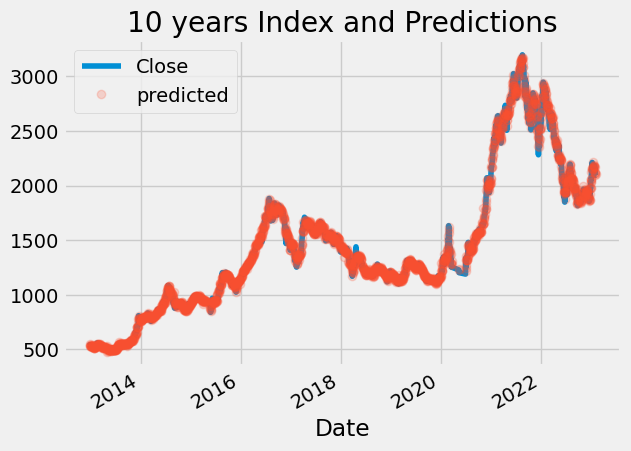

In [12]:
df_n['prediction']=reg_XGB.predict(X)
fig,ax = plt.subplots()
df_n['Close'].plot(ax=ax)
df_n['prediction'].plot(style='o',ax=ax,alpha=0.2,label='predicted')
plt.legend()
plt.title('10 years Index and Predictions')
plt.show()


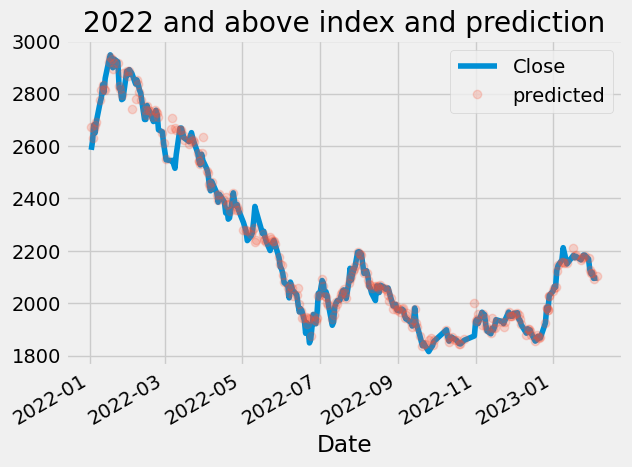

In [13]:
zoomed_df=df_n[df_n.index >'1-1-2022']
fig,ax = plt.subplots()
zoomed_df['Close'].plot(ax=ax)
zoomed_df['prediction'].plot(style='o',ax=ax,alpha=0.2,label='predicted')
plt.title('2022 and above index and prediction')
plt.legend()
plt.show()

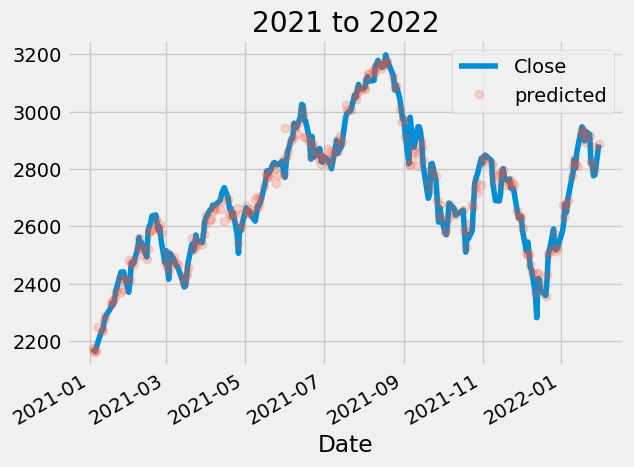

In [14]:
zoomed_df1=df_n[(df_n.index >'1-1-2021') & (df_n.index <= '1-30-2022')]
fig,ax = plt.subplots()
zoomed_df1['Close'].plot(ax=ax)
zoomed_df1['prediction'].plot(style='o',ax=ax,alpha=0.2,label='predicted')
plt.legend()
plt.title("2021 to 2022")
plt.show()

# Future Predictions

In this section I created features for future dates and used those features to run the model and predict the NEPSE index close value based on those features. I have predicted the NEPSE value till feburary 28. During the period, the model predicts lowest point of NEPSE index value to be 2100 and highest 2240.

            year  day_of_week  quarter  day  month
Date                                              
2023-02-05  2023            6        1    5      2
2023-02-06  2023            0        1    6      2
2023-02-07  2023            1        1    7      2
2023-02-08  2023            2        1    8      2
2023-02-09  2023            3        1    9      2


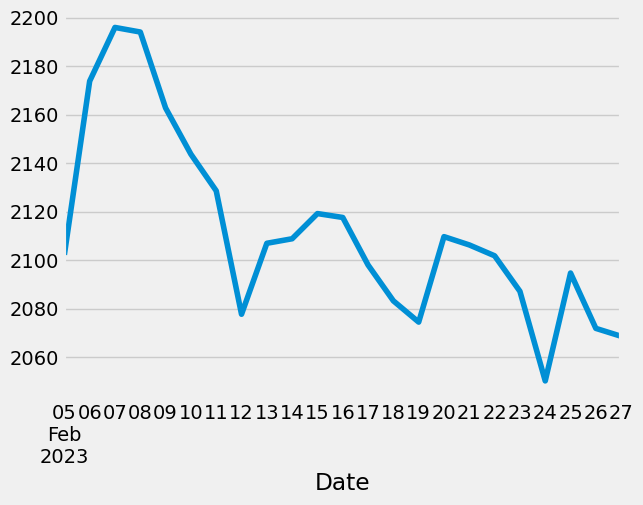

datetime64[ns]
            year  day_of_week  quarter  day  month   prediction
Date                                                           
2023-02-05  2023            6        1    5      2  2102.155762
2023-02-06  2023            0        1    6      2  2173.798828
2023-02-07  2023            1        1    7      2  2195.945557
2023-02-08  2023            2        1    8      2  2194.061523
2023-02-09  2023            3        1    9      2  2162.735107
2023-02-10  2023            4        1   10      2  2143.658936
2023-02-11  2023            5        1   11      2  2128.557373
2023-02-12  2023            6        1   12      2  2077.629639
2023-02-13  2023            0        1   13      2  2106.908691
2023-02-14  2023            1        1   14      2  2108.777344
2023-02-15  2023            2        1   15      2  2119.165527
2023-02-16  2023            3        1   16      2  2117.558350
2023-02-17  2023            4        1   17      2  2097.953613
2023-02-18  2023         

In [15]:
predictor_con=pd.DataFrame({'Date':pd.Series(dtype='datetime64[ns]')})
predictor_con['Date']=np.arange(df_n.index[0],datetime.datetime(2023, 2,28), datetime.timedelta(days=1))
predictor_con['year']=predictor_con.Date.dt.year
predictor_con['day_of_week']=predictor_con.Date.dt.dayofweek
predictor_con['quarter']=predictor_con.Date.dt.quarter
predictor_con['day']=predictor_con.Date.dt.day
predictor_con['month']=predictor_con.Date.dt.month
#predictor_con.index=pd.to_datetime(predictor_con.index)
#predictor_con_features= create_features(predictor_con)
predictor_con.set_index('Date',drop=True,inplace=True)
print(predictor_con.head())
predictor_con['prediction']=reg_XGB.predict(predictor_con.copy())
predictor_con['prediction'].plot()
plt.show()
print(predictor_con.index.dtype)
print(predictor_con.head(30))
print(reg_XGB.predict(pd.DataFrame({"year":[2023],"day_of_week":[2],"quarter":[1],"day":[4],"month":1})))

In [16]:

#inp1=input('Year? ex:2020  ')
#inp2=input('day_of_week? format: 0-Monday to 6-sunday  ')
#inp3=input('quarter? ex:jan1 to March30: 1, April1 to June30: 2, july 1 to september 30: 3, October1 to December31: 4  ')
#inp4=input('Day of month?, format: 1 to 31  ')
#inp5=input('Month? format: 1-january to 12-Dec ')
#predictor=pd.DataFrame(data={'year':int(inp1),"day_of_week":int(inp2),'quarter':int(inp3),'day':int(inp5),'month':int(inp5)},index=[0])
#predictor_con=predictor.copy
#print(reg_XGB.predict(predictor.copy()))


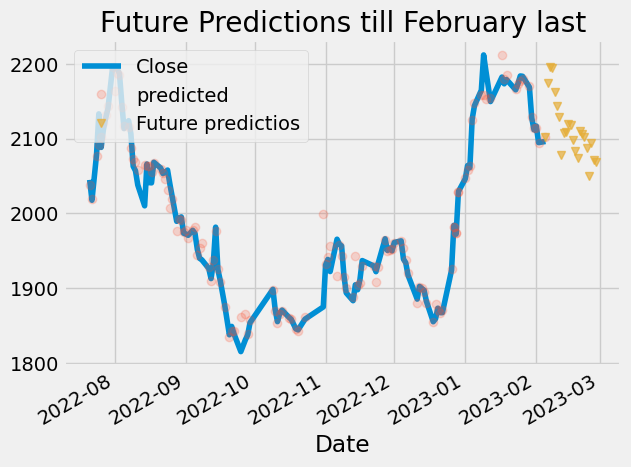

In [17]:
zoomed_df1=df_n[(df_n.index >'7-20-2022')]
fig,ax = plt.subplots()
zoomed_df1['Close'].plot(ax=ax)
zoomed_df1['prediction'].plot(style='o',ax=ax,alpha=0.2,label='predicted')
predictor_con['prediction'].plot(style='v',ax=ax,alpha=0.7,label='Future predictios')
plt.legend(loc='upper left')
plt.title("Future Predictions till February last")
plt.show()

# Banking

I followed similar process for Banking sector and made predictions. However, the R^2 value of the banking sector is really poor. So, I would not be making decisions based on this model for banking sectors.

[09:55:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "early_stoping_rounds", "n_estimator" } are not used.

The score for XGBoost is -0.09308417971782301
The score for RandomForest is -0.0895830963080253
            year  day_of_week  quarter  day  month
Date                                              
2023-01-01  2023            6        1    1      1
2023-01-02  2023            0        1    2      1
2023-01-03  2023            1        1    3      1
2023-01-04  2023            2        1    4      1
2023-01-05  2023            3        1    5      1


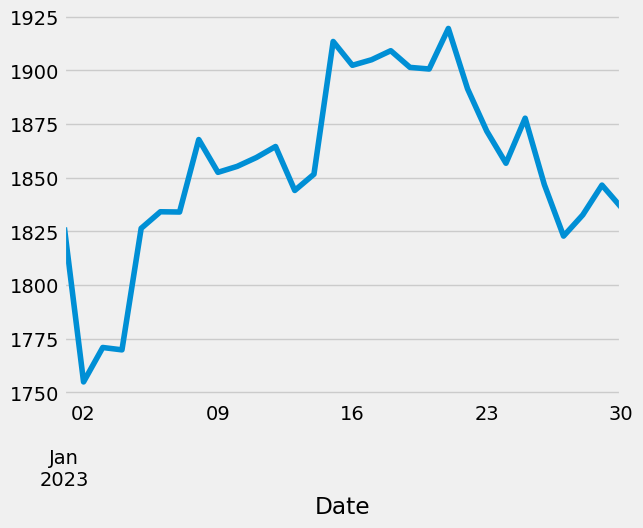

datetime64[ns]
            year  day_of_week  quarter  day  month   prediction
Date                                                           
2023-01-01  2023            6        1    1      1  1826.805786
2023-01-02  2023            0        1    2      1  1754.898926
2023-01-03  2023            1        1    3      1  1770.923950
2023-01-04  2023            2        1    4      1  1769.825684
2023-01-05  2023            3        1    5      1  1826.410400
2023-01-06  2023            4        1    6      1  1834.135864
2023-01-07  2023            5        1    7      1  1834.013428
2023-01-08  2023            6        1    8      1  1867.770142
2023-01-09  2023            0        1    9      1  1852.492554
2023-01-10  2023            1        1   10      1  1855.267822


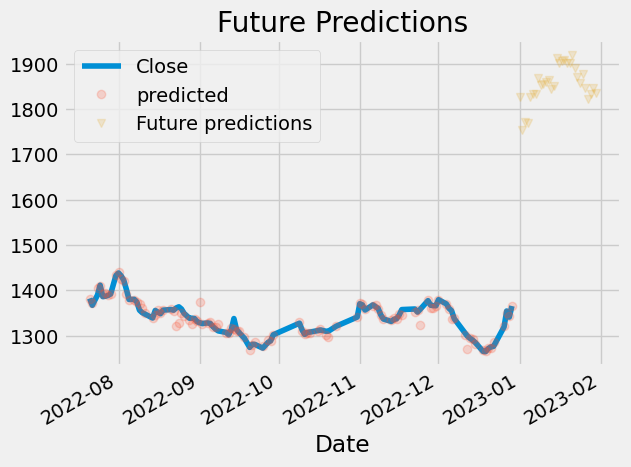

In [18]:
average_returns_indexes = {}
banking_df = pd.read_excel('BANKING.xlsx',parse_dates=True,skiprows=1,index_col='Date')
banking_df = banking_df[['Close']]
banking_df_n = create_features(banking_df)
X_banking=banking_df_n.drop('Close',axis=1)
y_banking=banking_df_n['Close']
X_banking_train,X_banking_test,y_banking_train,y_banking_test = train_test_split(X_banking,y_banking,test_size=0.3,random_state=s)
reg_XGB_banking=xgb.XGBRegressor(n_estimator=1000,early_stoping_rounds=50)
reg_RF_banking=RandomForestRegressor()
reg_XGB_banking.fit(X_banking_train,y_banking_train)
reg_RF_banking.fit(X_banking_train,y_banking_train)
y_pred_xgb=reg_XGB.predict(X_banking_test)
y_pred_RF=reg_RF.predict(X_banking_test)
print('The score for XGBoost is {}'.format(reg_XGB.score(X_banking_test,y_banking_test)))
print('The score for RandomForest is {}'.format(reg_RF.score(X_banking_test,y_banking_test)))

predictor_con_banking=pd.DataFrame({'Date':pd.Series(dtype='datetime64[ns]')})
predictor_con_banking['Date']=np.arange(datetime.datetime(2023, 1,1),datetime.datetime(2023, 1,31), datetime.timedelta(days=1))
predictor_con_banking['year']=predictor_con_banking.Date.dt.year
predictor_con_banking['day_of_week']=predictor_con_banking.Date.dt.dayofweek
predictor_con_banking['quarter']=predictor_con_banking.Date.dt.quarter
predictor_con_banking['day']=predictor_con_banking.Date.dt.day
predictor_con_banking['month']=predictor_con_banking.Date.dt.month
predictor_con.index=pd.to_datetime(predictor_con.index)
#predictor_con_banking_features= create_features(predictor_con_banking)
predictor_con_banking.set_index('Date',drop=True,inplace=True)
print(predictor_con_banking.head())
predictor_con_banking['prediction']=reg_XGB_banking.predict(predictor_con_banking.copy())
predictor_con_banking['prediction'].plot()
plt.show()
print(predictor_con_banking.index.dtype)
print(predictor_con_banking.head(10))


banking_df_n['prediction']=reg_XGB_banking.predict(X_banking)
zoomed_banking_df1=banking_df_n[(banking_df_n.index >'7-20-2022') & (banking_df_n.index <= '12-29-2022')]
fig,ax = plt.subplots()
zoomed_banking_df1['Close'].plot(ax=ax)
zoomed_banking_df1['prediction'].plot(style='o',ax=ax,alpha=0.2,label='predicted')
predictor_con_banking['prediction'].plot(style='v',ax=ax,alpha=0.2,label='Future predictions')
plt.legend(loc='upper left')
plt.title("Future Predictions")
plt.show()
average_returns_indexes['banking'] = (sum(predictor_con_banking['prediction'])/len(predictor_con_banking['prediction']))/banking_df.iloc[0,0]


# Codewriter Function

I developed a code writing function that writes code for the given sector or stock and its data file. I used this codewriter function to apply the procedure above for different sectors and some stocks which are name below with their R^2 scores:

1) Development Banks : 0.61
2) Finance : -0.16
3) Hotels : 0.14
4) Hydropowers : -0.20
5) Life Insurance : -3.3
6) None Life Insurance : -3.8
7) Micro Finance : -0.57
8) Investments : -17621
9) Others : -0.26
10) SSHL : -577
11) NTC : -9.58
12) NMB : -88.23
13) HDL : 0.35

I did this to compare the average predicted returns of the sectors, so that investors can invest in those sector. However, the R^2 score of the model on sector data were really poor. So, decision making to choose sector based on the model would not be the optimum choice. Despite having low R^2 value, I have kept the code for these sectors as I might find a better way to improve the model that fits sector in future. 

In [19]:
def codewriter(n,fn):
    c="""banking_df = pd.read_excel('BANKING.xlsx',parse_dates=True,skiprows=1,index_col='Date')
banking_df = banking_df[['Close']]
banking_df_n = create_features(banking_df)
X_banking=banking_df_n.drop('Close',axis=1)
y_banking=banking_df_n['Close']
X_banking_train,X_banking_test,y_banking_train,y_banking_test = train_test_split(X_banking,y_banking,test_size=0.3)
reg_XGB_banking=xgb.XGBRegressor(n_estimator=1000,early_stoping_rounds=50)
reg_RF_banking=RandomForestRegressor()
reg_XGB_banking.fit(X_banking_train,y_banking_train)
reg_RF_banking.fit(X_banking_train,y_banking_train)
y_pred_xgb=reg_XGB.predict(X_banking_test)
y_pred_RF=reg_RF.predict(X_banking_test)
print('The score for XGBoost is {}'.format(reg_XGB.score(X_banking_test,y_banking_test)))
print('The score for RandomForest is {}'.format(reg_RF.score(X_banking_test,y_banking_test)))

predictor_con_banking=pd.DataFrame({'Date':pd.Series(dtype='datetime64[ns]')})
predictor_con_banking['Date']=np.arange(datetime.datetime(2022, 12,29),datetime.datetime(2023, 1,31), datetime.timedelta(days=1))
predictor_con_banking['year']=predictor_con_banking.Date.dt.year
predictor_con_banking['day_of_week']=predictor_con_banking.Date.dt.dayofweek
predictor_con_banking['quarter']=predictor_con_banking.Date.dt.quarter
predictor_con_banking['day']=predictor_con_banking.Date.dt.day
predictor_con_banking['month']=predictor_con_banking.Date.dt.month
predictor_con.index=pd.to_datetime(predictor_con.index)
#predictor_con_banking_features= create_features(predictor_con_banking)
predictor_con_banking.set_index('Date',drop=True,inplace=True)
print(predictor_con_banking.head())
predictor_con_banking['prediction']=reg_XGB_banking.predict(predictor_con_banking.copy())
predictor_con_banking['prediction'].plot()
plt.show()
print(predictor_con_banking.index.dtype)
print(predictor_con_banking.head(10))


banking_df_n['prediction']=reg_XGB_banking.predict(X_banking)
zoomed_banking_df1=banking_df_n[(banking_df_n.index >'7-20-2022') & (banking_df_n.index <= '12-29-2022')]
fig,ax = plt.subplots()
zoomed_banking_df1['Close'].plot(ax=ax)
zoomed_banking_df1['prediction'].plot(style='o',ax=ax,alpha=0.2,label='predicted')
predictor_con_banking['prediction'].plot(style='v',ax=ax,alpha=0.2,label='Future predictions')
plt.legend(loc='upper left')
plt.title("Future Predictions")
plt.show()
average_returns_indexes['banking'] = (sum(predictor_con_banking['prediction'])/len(predictor_con_banking['prediction']))/banking_df.iloc[0,0]"""
    a=c.replace('banking',n)
    b=a.replace('BANKING',fn)
    return b

# Development Banks

Development Banks : 0.61

[09:55:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "early_stoping_rounds", "n_estimator" } are not used.

The score for XGBoost is 0.6131411270200219
The score for RandomForest is 0.6122652671345042
            year  day_of_week  quarter  day  month
Date                                              
2023-01-01  2023            6        1    1      1
2023-01-02  2023            0        1    2      1
2023-01-03  2023            1        1    3      1
2023-01-04  2023            2        1    4      1
2023-01-05  2023            3        1    5      1


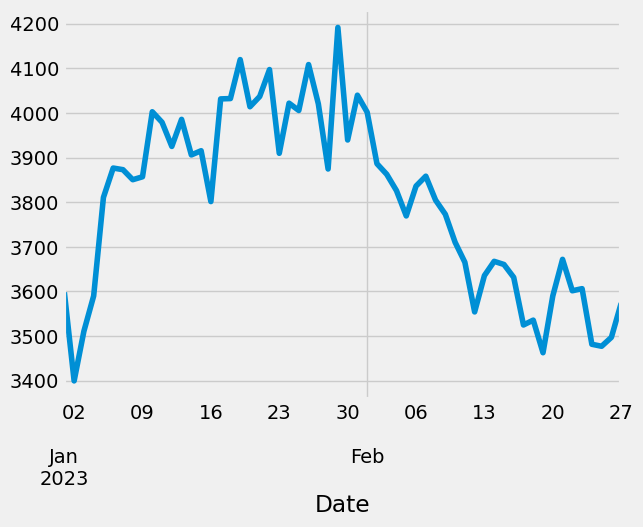

datetime64[ns]
            year  day_of_week  quarter  day  month   prediction
Date                                                           
2023-01-01  2023            6        1    1      1  3598.045166
2023-01-02  2023            0        1    2      1  3399.695068
2023-01-03  2023            1        1    3      1  3510.942139
2023-01-04  2023            2        1    4      1  3590.043945
2023-01-05  2023            3        1    5      1  3810.660400
2023-01-06  2023            4        1    6      1  3876.424316
2023-01-07  2023            5        1    7      1  3872.765137
2023-01-08  2023            6        1    8      1  3850.318604
2023-01-09  2023            0        1    9      1  3856.846191
2023-01-10  2023            1        1   10      1  4002.541748


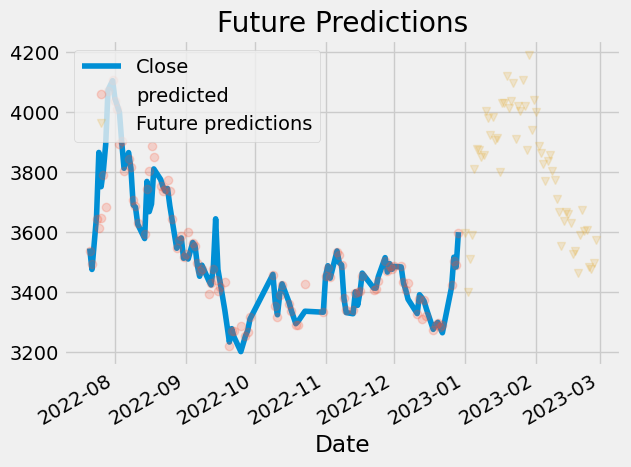

In [20]:
#print(codewriter('development_bank','DEVELOPMENTBANK'))
development_bank_df = pd.read_excel('DEVELOPMENTBANK.xlsx',parse_dates=True,skiprows=1,index_col='Date')
development_bank_df = development_bank_df[['Close']]
development_bank_df_n = create_features(development_bank_df)
X_development_bank=development_bank_df_n.drop('Close',axis=1)
y_development_bank=development_bank_df_n['Close']
X_development_bank_train,X_development_bank_test,y_development_bank_train,y_development_bank_test = train_test_split(X_development_bank,y_development_bank,test_size=0.3,random_state=s)
reg_XGB_development_bank=xgb.XGBRegressor(n_estimator=1000,early_stoping_rounds=50)
reg_RF_development_bank=RandomForestRegressor()
reg_XGB_development_bank.fit(X_development_bank_train,y_development_bank_train)
reg_RF_development_bank.fit(X_development_bank_train,y_development_bank_train)
y_pred_xgb=reg_XGB.predict(X_development_bank_test)
y_pred_RF=reg_RF.predict(X_development_bank_test)
print('The score for XGBoost is {}'.format(reg_XGB.score(X_development_bank_test,y_development_bank_test)))
print('The score for RandomForest is {}'.format(reg_RF.score(X_development_bank_test,y_development_bank_test)))

predictor_con_development_bank=pd.DataFrame({'Date':pd.Series(dtype='datetime64[ns]')})
predictor_con_development_bank['Date']=np.arange(development_bank_df_n.index[0],datetime.datetime(2023, 2,28), datetime.timedelta(days=1))
predictor_con_development_bank['year']=predictor_con_development_bank.Date.dt.year
predictor_con_development_bank['day_of_week']=predictor_con_development_bank.Date.dt.dayofweek
predictor_con_development_bank['quarter']=predictor_con_development_bank.Date.dt.quarter
predictor_con_development_bank['day']=predictor_con_development_bank.Date.dt.day
predictor_con_development_bank['month']=predictor_con_development_bank.Date.dt.month
predictor_con.index=pd.to_datetime(predictor_con.index)
#predictor_con_development_bank_features= create_features(predictor_con_development_bank)
predictor_con_development_bank.set_index('Date',drop=True,inplace=True)
print(predictor_con_development_bank.head())
predictor_con_development_bank['prediction']=reg_XGB_development_bank.predict(predictor_con_development_bank.copy())
predictor_con_development_bank['prediction'].plot()
plt.show()
print(predictor_con_development_bank.index.dtype)
print(predictor_con_development_bank.head(10))


development_bank_df_n['prediction']=reg_XGB_development_bank.predict(X_development_bank)
zoomed_development_bank_df1=development_bank_df_n[(development_bank_df_n.index >'7-20-2022') & (development_bank_df_n.index <= '12-29-2022')]
fig,ax = plt.subplots()
zoomed_development_bank_df1['Close'].plot(ax=ax)
zoomed_development_bank_df1['prediction'].plot(style='o',ax=ax,alpha=0.2,label='predicted')
predictor_con_development_bank['prediction'].plot(style='v',ax=ax,alpha=0.2,label='Future predictions')
plt.legend(loc='upper left')
plt.title("Future Predictions")
plt.show()
average_returns_indexes['development_bank'] = (sum(predictor_con_development_bank['prediction'])/len(predictor_con_development_bank['prediction']))/development_bank_df.iloc[0,0]

# Finance

Finance : -0.16

[09:55:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "early_stoping_rounds", "n_estimator" } are not used.

The score for XGBoost is -0.17128348050836562
The score for RandomForest is -0.1706228282898541
            year  day_of_week  quarter  day  month
Date                                              
2022-12-29  2022            3        4   29     12
2022-12-30  2022            4        4   30     12
2022-12-31  2022            5        4   31     12
2023-01-01  2023            6        1    1      1
2023-01-02  2023            0        1    2      1


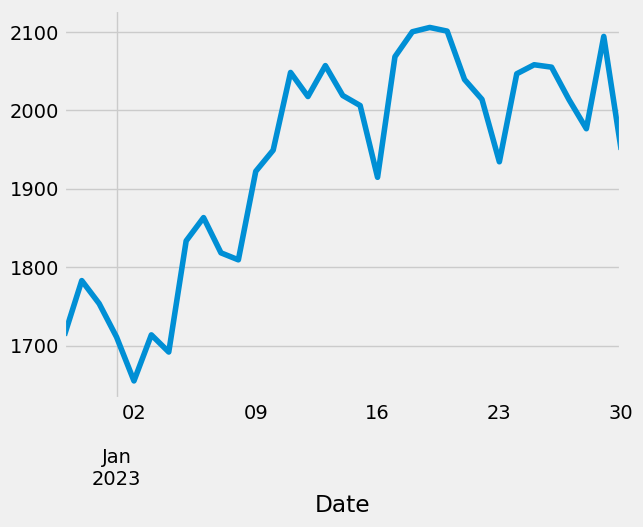

datetime64[ns]
            year  day_of_week  quarter  day  month   prediction
Date                                                           
2022-12-29  2022            3        4   29     12  1712.893433
2022-12-30  2022            4        4   30     12  1782.889160
2022-12-31  2022            5        4   31     12  1753.564941
2023-01-01  2023            6        1    1      1  1710.894287
2023-01-02  2023            0        1    2      1  1654.970581
2023-01-03  2023            1        1    3      1  1713.682983
2023-01-04  2023            2        1    4      1  1691.776733
2023-01-05  2023            3        1    5      1  1833.546021
2023-01-06  2023            4        1    6      1  1863.226074
2023-01-07  2023            5        1    7      1  1818.293579


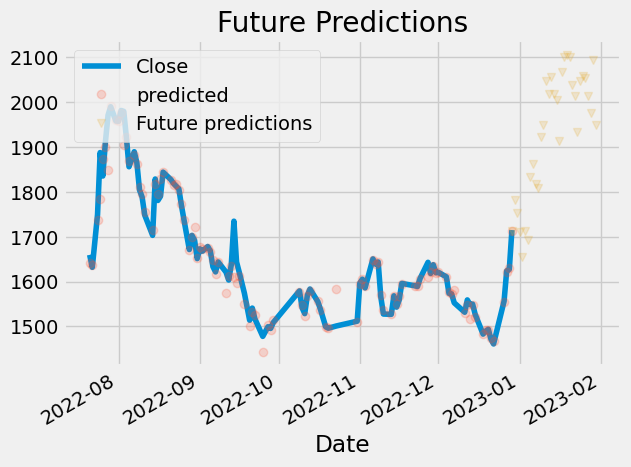

In [21]:
#print(codewriter('finance','FINANCE'))
finance_df = pd.read_excel('FINANCE.xlsx',parse_dates=True,skiprows=1,index_col='Date')
finance_df = finance_df[['Close']]
finance_df_n = create_features(finance_df)
X_finance=finance_df_n.drop('Close',axis=1)
y_finance=finance_df_n['Close']
X_finance_train,X_finance_test,y_finance_train,y_finance_test = train_test_split(X_finance,y_finance,test_size=0.3,random_state=s)
reg_XGB_finance=xgb.XGBRegressor(n_estimator=1000,early_stoping_rounds=50)
reg_RF_finance=RandomForestRegressor()
reg_XGB_finance.fit(X_finance_train,y_finance_train)
reg_RF_finance.fit(X_finance_train,y_finance_train)
y_pred_xgb=reg_XGB.predict(X_finance_test)
y_pred_RF=reg_RF.predict(X_finance_test)
print('The score for XGBoost is {}'.format(reg_XGB.score(X_finance_test,y_finance_test)))
print('The score for RandomForest is {}'.format(reg_RF.score(X_finance_test,y_finance_test)))

predictor_con_finance=pd.DataFrame({'Date':pd.Series(dtype='datetime64[ns]')})
predictor_con_finance['Date']=np.arange(datetime.datetime(2022, 12,29),datetime.datetime(2023, 1,31), datetime.timedelta(days=1))
predictor_con_finance['year']=predictor_con_finance.Date.dt.year
predictor_con_finance['day_of_week']=predictor_con_finance.Date.dt.dayofweek
predictor_con_finance['quarter']=predictor_con_finance.Date.dt.quarter
predictor_con_finance['day']=predictor_con_finance.Date.dt.day
predictor_con_finance['month']=predictor_con_finance.Date.dt.month
predictor_con.index=pd.to_datetime(predictor_con.index)
#predictor_con_finance_features= create_features(predictor_con_finance)
predictor_con_finance.set_index('Date',drop=True,inplace=True)
print(predictor_con_finance.head())
predictor_con_finance['prediction']=reg_XGB_finance.predict(predictor_con_finance.copy())
predictor_con_finance['prediction'].plot()
plt.show()
print(predictor_con_finance.index.dtype)
print(predictor_con_finance.head(10))


finance_df_n['prediction']=reg_XGB_finance.predict(X_finance)
zoomed_finance_df1=finance_df_n[(finance_df_n.index >'7-20-2022') & (finance_df_n.index <= '12-29-2022')]
fig,ax = plt.subplots()
zoomed_finance_df1['Close'].plot(ax=ax)
zoomed_finance_df1['prediction'].plot(style='o',ax=ax,alpha=0.2,label='predicted')
predictor_con_finance['prediction'].plot(style='v',ax=ax,alpha=0.2,label='Future predictions')
plt.legend(loc='upper left')
plt.title("Future Predictions")
plt.show()
average_returns_indexes['finance'] = (sum(predictor_con_finance['prediction'])/len(predictor_con_finance['prediction']))/finance_df.iloc[0,0]

# Hotels

Hotels : 0.14

[09:55:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "early_stoping_rounds", "n_estimator" } are not used.

The score for XGBoost is 0.1508231315507793
The score for RandomForest is 0.15005404001196687
            year  day_of_week  quarter  day  month
Date                                              
2022-12-29  2022            3        4   29     12
2022-12-30  2022            4        4   30     12
2022-12-31  2022            5        4   31     12
2023-01-01  2023            6        1    1      1
2023-01-02  2023            0        1    2      1


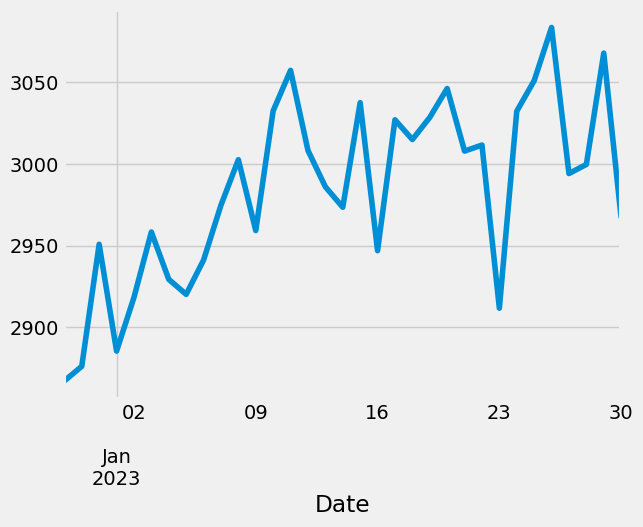

datetime64[ns]
            year  day_of_week  quarter  day  month   prediction
Date                                                           
2022-12-29  2022            3        4   29     12  2867.066406
2022-12-30  2022            4        4   30     12  2876.013184
2022-12-31  2022            5        4   31     12  2950.832520
2023-01-01  2023            6        1    1      1  2885.341553
2023-01-02  2023            0        1    2      1  2918.266846
2023-01-03  2023            1        1    3      1  2958.337646
2023-01-04  2023            2        1    4      1  2929.327881
2023-01-05  2023            3        1    5      1  2920.123535
2023-01-06  2023            4        1    6      1  2941.119141
2023-01-07  2023            5        1    7      1  2974.815186


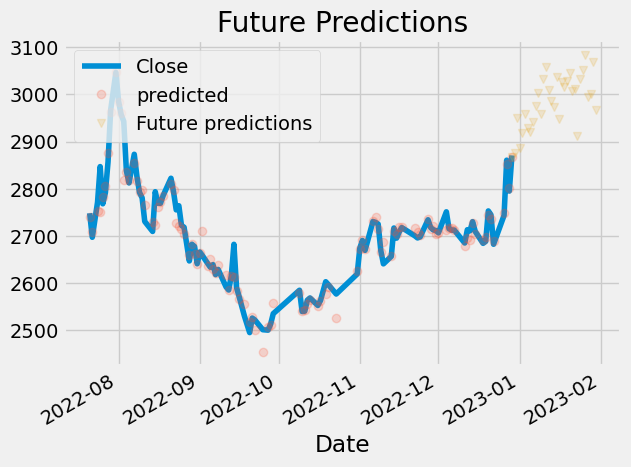

In [22]:
#print(codewriter('hotels_and_tourism','HOTELS_AND_TOURISM'))
hotels_and_tourism_df = pd.read_excel('HOTELS_AND_TOURISM.xlsx',parse_dates=True,skiprows=1,index_col='Date')
hotels_and_tourism_df = hotels_and_tourism_df[['Close']]
hotels_and_tourism_df_n = create_features(hotels_and_tourism_df)
X_hotels_and_tourism=hotels_and_tourism_df_n.drop('Close',axis=1)
y_hotels_and_tourism=hotels_and_tourism_df_n['Close']
X_hotels_and_tourism_train,X_hotels_and_tourism_test,y_hotels_and_tourism_train,y_hotels_and_tourism_test = train_test_split(X_hotels_and_tourism,y_hotels_and_tourism,test_size=0.3,random_state=s)
reg_XGB_hotels_and_tourism=xgb.XGBRegressor(n_estimator=1000,early_stoping_rounds=50)
reg_RF_hotels_and_tourism=RandomForestRegressor()
reg_XGB_hotels_and_tourism.fit(X_hotels_and_tourism_train,y_hotels_and_tourism_train)
reg_RF_hotels_and_tourism.fit(X_hotels_and_tourism_train,y_hotels_and_tourism_train)
y_pred_xgb=reg_XGB.predict(X_hotels_and_tourism_test)
y_pred_RF=reg_RF.predict(X_hotels_and_tourism_test)
print('The score for XGBoost is {}'.format(reg_XGB.score(X_hotels_and_tourism_test,y_hotels_and_tourism_test)))
print('The score for RandomForest is {}'.format(reg_RF.score(X_hotels_and_tourism_test,y_hotels_and_tourism_test)))

predictor_con_hotels_and_tourism=pd.DataFrame({'Date':pd.Series(dtype='datetime64[ns]')})
predictor_con_hotels_and_tourism['Date']=np.arange(datetime.datetime(2022, 12,29),datetime.datetime(2023, 1,31), datetime.timedelta(days=1))
predictor_con_hotels_and_tourism['year']=predictor_con_hotels_and_tourism.Date.dt.year
predictor_con_hotels_and_tourism['day_of_week']=predictor_con_hotels_and_tourism.Date.dt.dayofweek
predictor_con_hotels_and_tourism['quarter']=predictor_con_hotels_and_tourism.Date.dt.quarter
predictor_con_hotels_and_tourism['day']=predictor_con_hotels_and_tourism.Date.dt.day
predictor_con_hotels_and_tourism['month']=predictor_con_hotels_and_tourism.Date.dt.month
predictor_con.index=pd.to_datetime(predictor_con.index)
#predictor_con_hotels_and_tourism_features= create_features(predictor_con_hotels_and_tourism)
predictor_con_hotels_and_tourism.set_index('Date',drop=True,inplace=True)
print(predictor_con_hotels_and_tourism.head())
predictor_con_hotels_and_tourism['prediction']=reg_XGB_hotels_and_tourism.predict(predictor_con_hotels_and_tourism.copy())
predictor_con_hotels_and_tourism['prediction'].plot()
plt.show()
print(predictor_con_hotels_and_tourism.index.dtype)
print(predictor_con_hotels_and_tourism.head(10))


hotels_and_tourism_df_n['prediction']=reg_XGB_hotels_and_tourism.predict(X_hotels_and_tourism)
zoomed_hotels_and_tourism_df1=hotels_and_tourism_df_n[(hotels_and_tourism_df_n.index >'7-20-2022') & (hotels_and_tourism_df_n.index <= '12-29-2022')]
fig,ax = plt.subplots()
zoomed_hotels_and_tourism_df1['Close'].plot(ax=ax)
zoomed_hotels_and_tourism_df1['prediction'].plot(style='o',ax=ax,alpha=0.2,label='predicted')
predictor_con_hotels_and_tourism['prediction'].plot(style='v',ax=ax,alpha=0.2,label='Future predictions')
plt.legend(loc='upper left')
plt.title("Future Predictions")
plt.show()
average_returns_indexes['hotels_and_tourism'] = (sum(predictor_con_hotels_and_tourism['prediction'])/len(predictor_con_hotels_and_tourism['prediction']))/hotels_and_tourism_df.iloc[0,0]

# Hydropower

Hydropowers : -0.20

[09:55:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "early_stoping_rounds", "n_estimator" } are not used.

The score for XGBoost is -0.1969195436251412
The score for RandomForest is -0.19860699955001948
            year  day_of_week  quarter  day  month
Date                                              
2022-12-29  2022            3        4   29     12
2022-12-30  2022            4        4   30     12
2022-12-31  2022            5        4   31     12
2023-01-01  2023            6        1    1      1
2023-01-02  2023            0        1    2      1


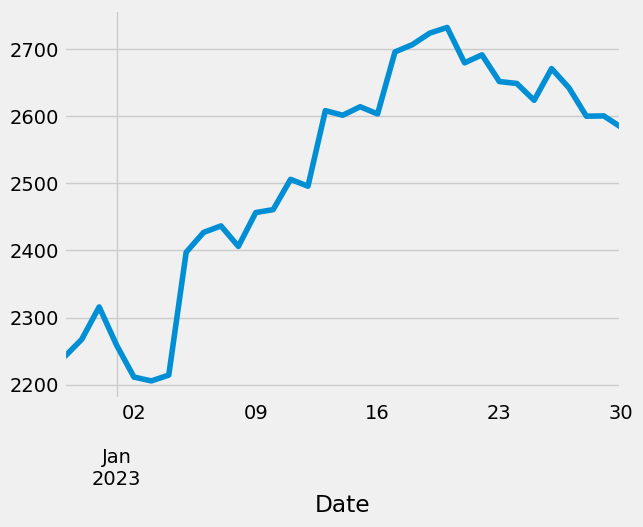

datetime64[ns]
            year  day_of_week  quarter  day  month   prediction
Date                                                           
2022-12-29  2022            3        4   29     12  2241.216553
2022-12-30  2022            4        4   30     12  2267.478271
2022-12-31  2022            5        4   31     12  2315.810791
2023-01-01  2023            6        1    1      1  2258.885742
2023-01-02  2023            0        1    2      1  2211.198730
2023-01-03  2023            1        1    3      1  2205.468750
2023-01-04  2023            2        1    4      1  2214.122803
2023-01-05  2023            3        1    5      1  2397.335693
2023-01-06  2023            4        1    6      1  2426.932861
2023-01-07  2023            5        1    7      1  2436.687744


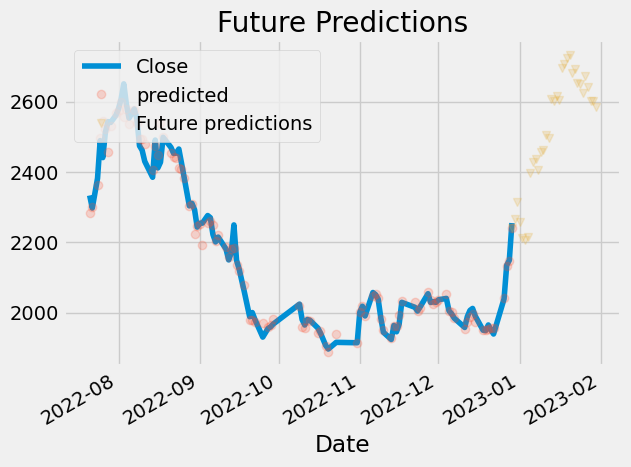

In [23]:
#print(codewriter('hydropower','HYDROPOWER'))
hydropower_df = pd.read_excel('HYDROPOWER.xlsx',parse_dates=True,skiprows=1,index_col='Date')
hydropower_df = hydropower_df[['Close']]
hydropower_df_n = create_features(hydropower_df)
X_hydropower=hydropower_df_n.drop('Close',axis=1)
y_hydropower=hydropower_df_n['Close']
X_hydropower_train,X_hydropower_test,y_hydropower_train,y_hydropower_test = train_test_split(X_hydropower,y_hydropower,test_size=0.3,random_state=s)
reg_XGB_hydropower=xgb.XGBRegressor(n_estimator=1000,early_stoping_rounds=50)
reg_RF_hydropower=RandomForestRegressor()
reg_XGB_hydropower.fit(X_hydropower_train,y_hydropower_train)
reg_RF_hydropower.fit(X_hydropower_train,y_hydropower_train)
y_pred_xgb=reg_XGB.predict(X_hydropower_test)
y_pred_RF=reg_RF.predict(X_hydropower_test)
print('The score for XGBoost is {}'.format(reg_XGB.score(X_hydropower_test,y_hydropower_test)))
print('The score for RandomForest is {}'.format(reg_RF.score(X_hydropower_test,y_hydropower_test)))

predictor_con_hydropower=pd.DataFrame({'Date':pd.Series(dtype='datetime64[ns]')})
predictor_con_hydropower['Date']=np.arange(datetime.datetime(2022, 12,29),datetime.datetime(2023, 1,31), datetime.timedelta(days=1))
predictor_con_hydropower['year']=predictor_con_hydropower.Date.dt.year
predictor_con_hydropower['day_of_week']=predictor_con_hydropower.Date.dt.dayofweek
predictor_con_hydropower['quarter']=predictor_con_hydropower.Date.dt.quarter
predictor_con_hydropower['day']=predictor_con_hydropower.Date.dt.day
predictor_con_hydropower['month']=predictor_con_hydropower.Date.dt.month
predictor_con.index=pd.to_datetime(predictor_con.index)
#predictor_con_hydropower_features= create_features(predictor_con_hydropower)
predictor_con_hydropower.set_index('Date',drop=True,inplace=True)
print(predictor_con_hydropower.head())
predictor_con_hydropower['prediction']=reg_XGB_hydropower.predict(predictor_con_hydropower.copy())
predictor_con_hydropower['prediction'].plot()
plt.show()
print(predictor_con_hydropower.index.dtype)
print(predictor_con_hydropower.head(10))


hydropower_df_n['prediction']=reg_XGB_hydropower.predict(X_hydropower)
zoomed_hydropower_df1=hydropower_df_n[(hydropower_df_n.index >'7-20-2022') & (hydropower_df_n.index <= '12-29-2022')]
fig,ax = plt.subplots()
zoomed_hydropower_df1['Close'].plot(ax=ax)
zoomed_hydropower_df1['prediction'].plot(style='o',ax=ax,alpha=0.2,label='predicted')
predictor_con_hydropower['prediction'].plot(style='v',ax=ax,alpha=0.2,label='Future predictions')
plt.legend(loc='upper left')
plt.title("Future Predictions")
plt.show()
average_returns_indexes['hydropower'] = (sum(predictor_con_hydropower['prediction'])/len(predictor_con_hydropower['prediction']))/hydropower_df.iloc[0,0]

# Life Insurance

Life Insurance : -3.3

[09:55:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "early_stoping_rounds", "n_estimator" } are not used.

The score for XGBoost is -3.3680726909636354
The score for RandomForest is -3.370733873091825
            year  day_of_week  quarter  day  month
Date                                              
2022-12-29  2022            3        4   29     12
2022-12-30  2022            4        4   30     12
2022-12-31  2022            5        4   31     12
2023-01-01  2023            6        1    1      1
2023-01-02  2023            0        1    2      1


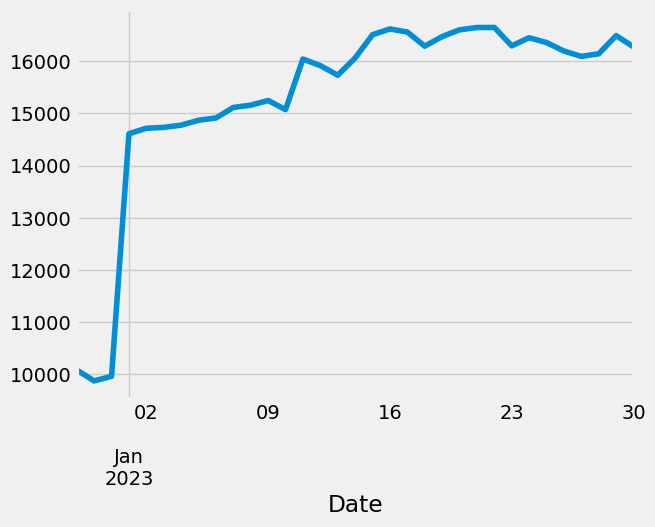

datetime64[ns]
            year  day_of_week  quarter  day  month    prediction
Date                                                            
2022-12-29  2022            3        4   29     12  10082.464844
2022-12-30  2022            4        4   30     12   9873.387695
2022-12-31  2022            5        4   31     12   9962.079102
2023-01-01  2023            6        1    1      1  14611.033203
2023-01-02  2023            0        1    2      1  14716.739258
2023-01-03  2023            1        1    3      1  14733.171875
2023-01-04  2023            2        1    4      1  14776.302734
2023-01-05  2023            3        1    5      1  14870.339844
2023-01-06  2023            4        1    6      1  14913.700195
2023-01-07  2023            5        1    7      1  15115.750000


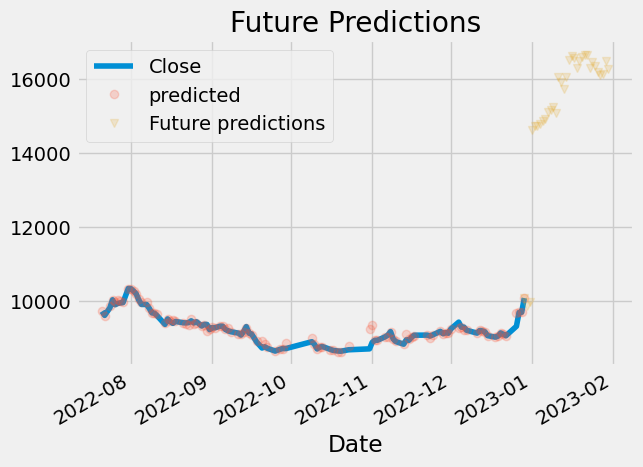

In [24]:
#print(codewriter('life_insurance','LIFEINSURANCE'))
life_insurance_df = pd.read_excel('LIFEINSURANCE.xlsx',parse_dates=True,skiprows=1,index_col='Date')
life_insurance_df = life_insurance_df[['Close']]
life_insurance_df_n = create_features(life_insurance_df)
X_life_insurance=life_insurance_df_n.drop('Close',axis=1)
y_life_insurance=life_insurance_df_n['Close']
X_life_insurance_train,X_life_insurance_test,y_life_insurance_train,y_life_insurance_test = train_test_split(X_life_insurance,y_life_insurance,test_size=0.3,random_state=s)
reg_XGB_life_insurance=xgb.XGBRegressor(n_estimator=1000,early_stoping_rounds=50)
reg_RF_life_insurance=RandomForestRegressor()
reg_XGB_life_insurance.fit(X_life_insurance_train,y_life_insurance_train)
reg_RF_life_insurance.fit(X_life_insurance_train,y_life_insurance_train)
y_pred_xgb=reg_XGB.predict(X_life_insurance_test)
y_pred_RF=reg_RF.predict(X_life_insurance_test)
print('The score for XGBoost is {}'.format(reg_XGB.score(X_life_insurance_test,y_life_insurance_test)))
print('The score for RandomForest is {}'.format(reg_RF.score(X_life_insurance_test,y_life_insurance_test)))

predictor_con_life_insurance=pd.DataFrame({'Date':pd.Series(dtype='datetime64[ns]')})
predictor_con_life_insurance['Date']=np.arange(datetime.datetime(2022, 12,29),datetime.datetime(2023, 1,31), datetime.timedelta(days=1))
predictor_con_life_insurance['year']=predictor_con_life_insurance.Date.dt.year
predictor_con_life_insurance['day_of_week']=predictor_con_life_insurance.Date.dt.dayofweek
predictor_con_life_insurance['quarter']=predictor_con_life_insurance.Date.dt.quarter
predictor_con_life_insurance['day']=predictor_con_life_insurance.Date.dt.day
predictor_con_life_insurance['month']=predictor_con_life_insurance.Date.dt.month
predictor_con.index=pd.to_datetime(predictor_con.index)
#predictor_con_life_insurance_features= create_features(predictor_con_life_insurance)
predictor_con_life_insurance.set_index('Date',drop=True,inplace=True)
print(predictor_con_life_insurance.head())
predictor_con_life_insurance['prediction']=reg_XGB_life_insurance.predict(predictor_con_life_insurance.copy())
predictor_con_life_insurance['prediction'].plot()
plt.show()
print(predictor_con_life_insurance.index.dtype)
print(predictor_con_life_insurance.head(10))


life_insurance_df_n['prediction']=reg_XGB_life_insurance.predict(X_life_insurance)
zoomed_life_insurance_df1=life_insurance_df_n[(life_insurance_df_n.index >'7-20-2022') & (life_insurance_df_n.index <= '12-29-2022')]
fig,ax = plt.subplots()
zoomed_life_insurance_df1['Close'].plot(ax=ax)
zoomed_life_insurance_df1['prediction'].plot(style='o',ax=ax,alpha=0.2,label='predicted')
predictor_con_life_insurance['prediction'].plot(style='v',ax=ax,alpha=0.2,label='Future predictions')
plt.legend(loc='upper left')
plt.title("Future Predictions")
plt.show()
average_returns_indexes['life_insurance'] = (sum(predictor_con_life_insurance['prediction'])/len(predictor_con_life_insurance['prediction']))/life_insurance_df.iloc[0,0]

# Non-Life Insurance

None Life Insurance : -3.8

[09:55:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "early_stoping_rounds", "n_estimator" } are not used.

The score for XGBoost is -3.8428334114968
The score for RandomForest is -3.846270656887116
            year  day_of_week  quarter  day  month
Date                                              
2022-12-29  2022            3        4   29     12
2022-12-30  2022            4        4   30     12
2022-12-31  2022            5        4   31     12
2023-01-01  2023            6        1    1      1
2023-01-02  2023            0        1    2      1


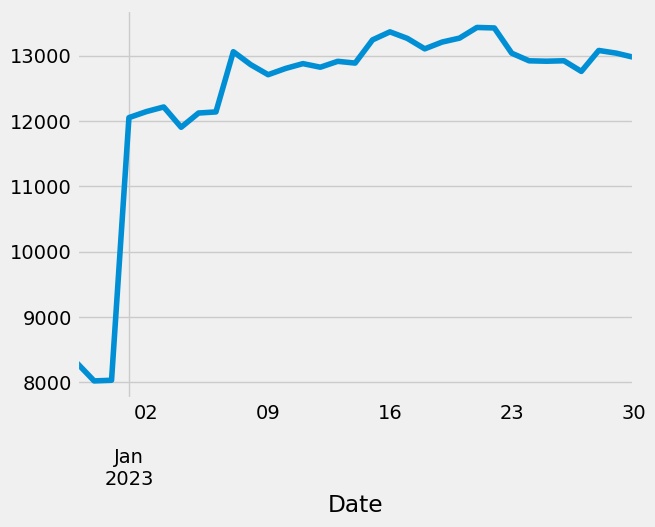

datetime64[ns]
            year  day_of_week  quarter  day  month    prediction
Date                                                            
2022-12-29  2022            3        4   29     12   8300.210938
2022-12-30  2022            4        4   30     12   8021.984863
2022-12-31  2022            5        4   31     12   8031.850098
2023-01-01  2023            6        1    1      1  12052.740234
2023-01-02  2023            0        1    2      1  12144.890625
2023-01-03  2023            1        1    3      1  12215.932617
2023-01-04  2023            2        1    4      1  11905.231445
2023-01-05  2023            3        1    5      1  12123.123047
2023-01-06  2023            4        1    6      1  12140.054688
2023-01-07  2023            5        1    7      1  13061.668945


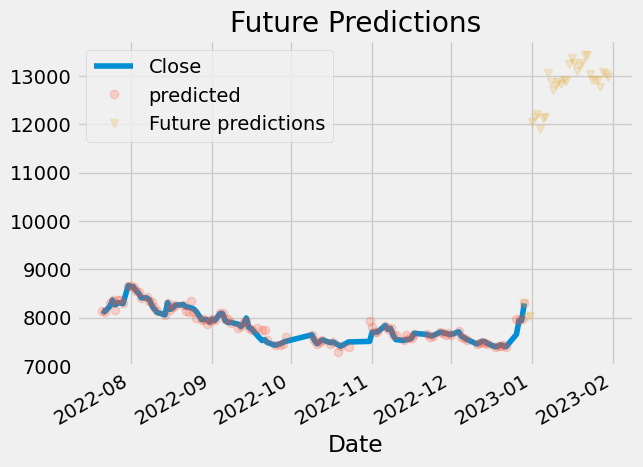

In [25]:
#print(codewriter('non_life_insurance','NONLIFEINSURANCE'))
non_life_insurance_df = pd.read_excel('NONLIFEINSURANCE.xlsx',parse_dates=True,skiprows=1,index_col='Date')
non_life_insurance_df = non_life_insurance_df[['Close']]
non_life_insurance_df_n = create_features(non_life_insurance_df)
X_non_life_insurance=non_life_insurance_df_n.drop('Close',axis=1)
y_non_life_insurance=non_life_insurance_df_n['Close']
X_non_life_insurance_train,X_non_life_insurance_test,y_non_life_insurance_train,y_non_life_insurance_test = train_test_split(X_non_life_insurance,y_non_life_insurance,test_size=0.3,random_state=s)
reg_XGB_non_life_insurance=xgb.XGBRegressor(n_estimator=1000,early_stoping_rounds=50)
reg_RF_non_life_insurance=RandomForestRegressor()
reg_XGB_non_life_insurance.fit(X_non_life_insurance_train,y_non_life_insurance_train)
reg_RF_non_life_insurance.fit(X_non_life_insurance_train,y_non_life_insurance_train)
y_pred_xgb=reg_XGB.predict(X_non_life_insurance_test)
y_pred_RF=reg_RF.predict(X_non_life_insurance_test)
print('The score for XGBoost is {}'.format(reg_XGB.score(X_non_life_insurance_test,y_non_life_insurance_test)))
print('The score for RandomForest is {}'.format(reg_RF.score(X_non_life_insurance_test,y_non_life_insurance_test)))

predictor_con_non_life_insurance=pd.DataFrame({'Date':pd.Series(dtype='datetime64[ns]')})
predictor_con_non_life_insurance['Date']=np.arange(datetime.datetime(2022, 12,29),datetime.datetime(2023, 1,31), datetime.timedelta(days=1))
predictor_con_non_life_insurance['year']=predictor_con_non_life_insurance.Date.dt.year
predictor_con_non_life_insurance['day_of_week']=predictor_con_non_life_insurance.Date.dt.dayofweek
predictor_con_non_life_insurance['quarter']=predictor_con_non_life_insurance.Date.dt.quarter
predictor_con_non_life_insurance['day']=predictor_con_non_life_insurance.Date.dt.day
predictor_con_non_life_insurance['month']=predictor_con_non_life_insurance.Date.dt.month
predictor_con.index=pd.to_datetime(predictor_con.index)
#predictor_con_non_life_insurance_features= create_features(predictor_con_non_life_insurance)
predictor_con_non_life_insurance.set_index('Date',drop=True,inplace=True)
print(predictor_con_non_life_insurance.head())
predictor_con_non_life_insurance['prediction']=reg_XGB_non_life_insurance.predict(predictor_con_non_life_insurance.copy())
predictor_con_non_life_insurance['prediction'].plot()
plt.show()
print(predictor_con_non_life_insurance.index.dtype)
print(predictor_con_non_life_insurance.head(10))


non_life_insurance_df_n['prediction']=reg_XGB_non_life_insurance.predict(X_non_life_insurance)
zoomed_non_life_insurance_df1=non_life_insurance_df_n[(non_life_insurance_df_n.index >'7-20-2022') & (non_life_insurance_df_n.index <= '12-29-2022')]
fig,ax = plt.subplots()
zoomed_non_life_insurance_df1['Close'].plot(ax=ax)
zoomed_non_life_insurance_df1['prediction'].plot(style='o',ax=ax,alpha=0.2,label='predicted')
predictor_con_non_life_insurance['prediction'].plot(style='v',ax=ax,alpha=0.2,label='Future predictions')
plt.legend(loc='upper left')
plt.title("Future Predictions")
plt.show()
average_returns_indexes['non_life_insurance'] = (sum(predictor_con_non_life_insurance['prediction'])/len(predictor_con_non_life_insurance['prediction']))/non_life_insurance_df.iloc[0,0]

# Microfinance

Micro Finance : -0.57

[09:55:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "early_stoping_rounds", "n_estimator" } are not used.

The score for XGBoost is -0.04981468195857963
The score for RandomForest is -0.052648097006609884
            year  day_of_week  quarter  day  month
Date                                              
2022-12-29  2022            3        4   29     12
2022-12-30  2022            4        4   30     12
2022-12-31  2022            5        4   31     12
2023-01-01  2023            6        1    1      1
2023-01-02  2023            0        1    2      1


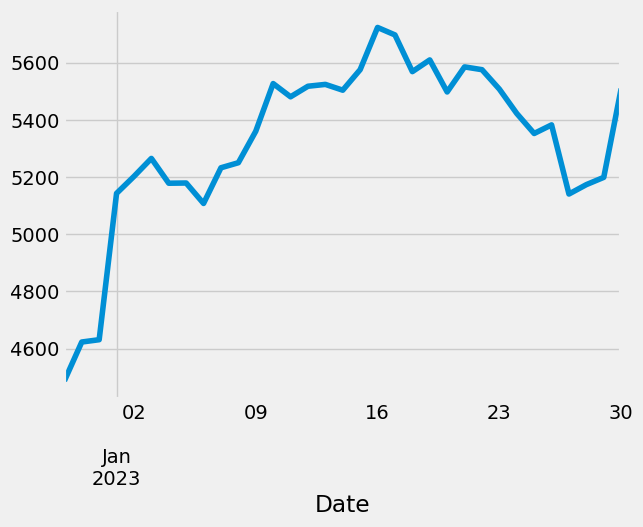

datetime64[ns]
            year  day_of_week  quarter  day  month   prediction
Date                                                           
2022-12-29  2022            3        4   29     12  4486.584473
2022-12-30  2022            4        4   30     12  4622.691895
2022-12-31  2022            5        4   31     12  4630.785645
2023-01-01  2023            6        1    1      1  5142.860840
2023-01-02  2023            0        1    2      1  5202.202148
2023-01-03  2023            1        1    3      1  5265.187012
2023-01-04  2023            2        1    4      1  5178.359863
2023-01-05  2023            3        1    5      1  5179.104980
2023-01-06  2023            4        1    6      1  5107.596191
2023-01-07  2023            5        1    7      1  5232.423340


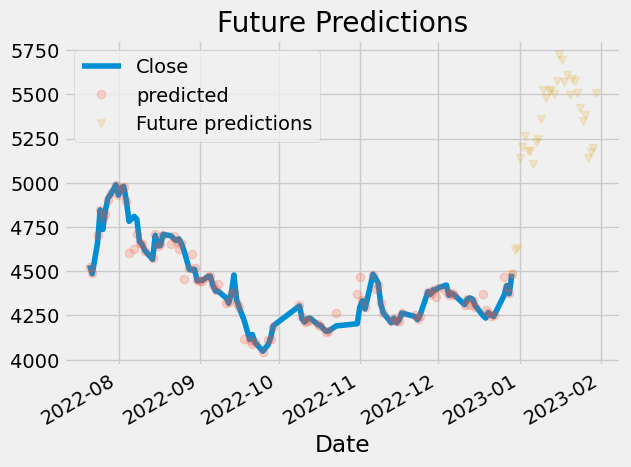

In [26]:
#print(codewriter('microfinance','MICROFINANCE'))
microfinance_df = pd.read_excel('MICROFINANCE.xlsx',parse_dates=True,skiprows=1,index_col='Date')
microfinance_df = microfinance_df[['Close']]
microfinance_df_n = create_features(microfinance_df)
X_microfinance=microfinance_df_n.drop('Close',axis=1)
y_microfinance=microfinance_df_n['Close']
X_microfinance_train,X_microfinance_test,y_microfinance_train,y_microfinance_test = train_test_split(X_microfinance,y_microfinance,test_size=0.3,random_state=s)
reg_XGB_microfinance=xgb.XGBRegressor(n_estimator=1000,early_stoping_rounds=50)
reg_RF_microfinance=RandomForestRegressor()
reg_XGB_microfinance.fit(X_microfinance_train,y_microfinance_train)
reg_RF_microfinance.fit(X_microfinance_train,y_microfinance_train)
y_pred_xgb=reg_XGB.predict(X_microfinance_test)
y_pred_RF=reg_RF.predict(X_microfinance_test)
print('The score for XGBoost is {}'.format(reg_XGB.score(X_microfinance_test,y_microfinance_test)))
print('The score for RandomForest is {}'.format(reg_RF.score(X_microfinance_test,y_microfinance_test)))

predictor_con_microfinance=pd.DataFrame({'Date':pd.Series(dtype='datetime64[ns]')})
predictor_con_microfinance['Date']=np.arange(datetime.datetime(2022, 12,29),datetime.datetime(2023, 1,31), datetime.timedelta(days=1))
predictor_con_microfinance['year']=predictor_con_microfinance.Date.dt.year
predictor_con_microfinance['day_of_week']=predictor_con_microfinance.Date.dt.dayofweek
predictor_con_microfinance['quarter']=predictor_con_microfinance.Date.dt.quarter
predictor_con_microfinance['day']=predictor_con_microfinance.Date.dt.day
predictor_con_microfinance['month']=predictor_con_microfinance.Date.dt.month
predictor_con.index=pd.to_datetime(predictor_con.index)
#predictor_con_microfinance_features= create_features(predictor_con_microfinance)
predictor_con_microfinance.set_index('Date',drop=True,inplace=True)
print(predictor_con_microfinance.head())
predictor_con_microfinance['prediction']=reg_XGB_microfinance.predict(predictor_con_microfinance.copy())
predictor_con_microfinance['prediction'].plot()
plt.show()
print(predictor_con_microfinance.index.dtype)
print(predictor_con_microfinance.head(10))


microfinance_df_n['prediction']=reg_XGB_microfinance.predict(X_microfinance)
zoomed_microfinance_df1=microfinance_df_n[(microfinance_df_n.index >'7-20-2022') & (microfinance_df_n.index <= '12-29-2022')]
fig,ax = plt.subplots()
zoomed_microfinance_df1['Close'].plot(ax=ax)
zoomed_microfinance_df1['prediction'].plot(style='o',ax=ax,alpha=0.2,label='predicted')
predictor_con_microfinance['prediction'].plot(style='v',ax=ax,alpha=0.2,label='Future predictions')
plt.legend(loc='upper left')
plt.title("Future Predictions")
plt.show()
average_returns_indexes['microfinance'] = (sum(predictor_con_microfinance['prediction'])/len(predictor_con_microfinance['prediction']))/microfinance_df.iloc[0,0]


# Investment

Investments : -17621

[09:55:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "early_stoping_rounds", "n_estimator" } are not used.

The score for XGBoost is -17726.917540765488
The score for RandomForest is -17742.621796135416
            year  day_of_week  quarter  day  month
Date                                              
2022-12-29  2022            3        4   29     12
2022-12-30  2022            4        4   30     12
2022-12-31  2022            5        4   31     12
2023-01-01  2023            6        1    1      1
2023-01-02  2023            0        1    2      1


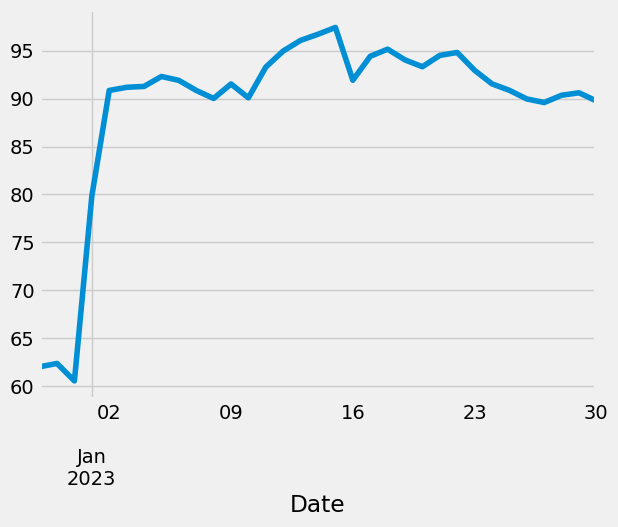

datetime64[ns]
            year  day_of_week  quarter  day  month  prediction
Date                                                          
2022-12-29  2022            3        4   29     12   62.041576
2022-12-30  2022            4        4   30     12   62.391346
2022-12-31  2022            5        4   31     12   60.570770
2023-01-01  2023            6        1    1      1   79.817490
2023-01-02  2023            0        1    2      1   90.843559
2023-01-03  2023            1        1    3      1   91.173660
2023-01-04  2023            2        1    4      1   91.263321
2023-01-05  2023            3        1    5      1   92.301910
2023-01-06  2023            4        1    6      1   91.896881
2023-01-07  2023            5        1    7      1   90.846924


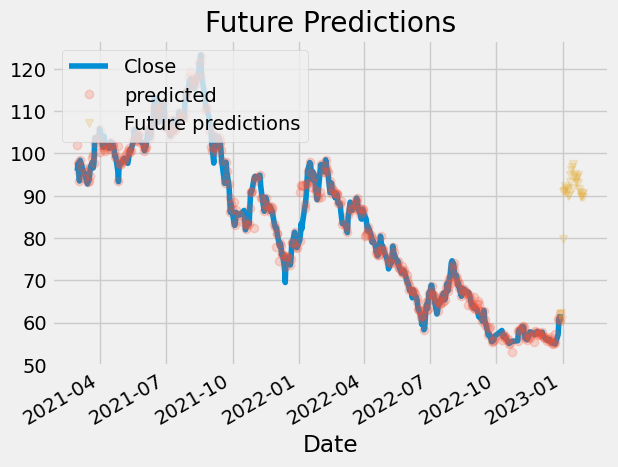

In [27]:
#print(codewriter('investment','INVESTMENT'))
investment_df = pd.read_excel('INVESTMENT.xlsx',parse_dates=True,skiprows=1,index_col='Date')
investment_df = investment_df[['Close']]
investment_df_n = create_features(investment_df)
X_investment=investment_df_n.drop('Close',axis=1)
y_investment=investment_df_n['Close']
X_investment_train,X_investment_test,y_investment_train,y_investment_test = train_test_split(X_investment,y_investment,test_size=0.3,random_state=s)
reg_XGB_investment=xgb.XGBRegressor(n_estimator=1000,early_stoping_rounds=50)
reg_RF_investment=RandomForestRegressor()
reg_XGB_investment.fit(X_investment_train,y_investment_train)
reg_RF_investment.fit(X_investment_train,y_investment_train)
y_pred_xgb=reg_XGB.predict(X_investment_test)
y_pred_RF=reg_RF.predict(X_investment_test)
print('The score for XGBoost is {}'.format(reg_XGB.score(X_investment_test,y_investment_test)))
print('The score for RandomForest is {}'.format(reg_RF.score(X_investment_test,y_investment_test)))

predictor_con_investment=pd.DataFrame({'Date':pd.Series(dtype='datetime64[ns]')})
predictor_con_investment['Date']=np.arange(datetime.datetime(2022, 12,29),datetime.datetime(2023, 1,31), datetime.timedelta(days=1))
predictor_con_investment['year']=predictor_con_investment.Date.dt.year
predictor_con_investment['day_of_week']=predictor_con_investment.Date.dt.dayofweek
predictor_con_investment['quarter']=predictor_con_investment.Date.dt.quarter
predictor_con_investment['day']=predictor_con_investment.Date.dt.day
predictor_con_investment['month']=predictor_con_investment.Date.dt.month
predictor_con.index=pd.to_datetime(predictor_con.index)
#predictor_con_investment_features= create_features(predictor_con_investment)
predictor_con_investment.set_index('Date',drop=True,inplace=True)
print(predictor_con_investment.head())
predictor_con_investment['prediction']=reg_XGB_investment.predict(predictor_con_investment.copy())
predictor_con_investment['prediction'].plot()
plt.show()
print(predictor_con_investment.index.dtype)
print(predictor_con_investment.head(10))


investment_df_n['prediction']=reg_XGB_investment.predict(X_investment)
zoomed_investment_df1=investment_df_n[(investment_df_n.index >'7-20-2013') & (investment_df_n.index <= '12-29-2022')]
fig,ax = plt.subplots()
zoomed_investment_df1['Close'].plot(ax=ax)
zoomed_investment_df1['prediction'].plot(style='o',ax=ax,alpha=0.2,label='predicted')
predictor_con_investment['prediction'].plot(style='v',ax=ax,alpha=0.2,label='Future predictions')
plt.legend(loc='upper left')
plt.title("Future Predictions")
plt.show()
average_returns_indexes['investment'] = (sum(predictor_con_investment['prediction'])/len(predictor_con_investment['prediction']))/investment_df.iloc[0,0]

# Others

Others : -0.26

[09:55:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "early_stoping_rounds", "n_estimator" } are not used.

The score for XGBoost is -0.27043690889562866
The score for RandomForest is -0.2699303078474764
            year  day_of_week  quarter  day  month
Date                                              
2022-12-29  2022            3        4   29     12
2022-12-30  2022            4        4   30     12
2022-12-31  2022            5        4   31     12
2023-01-01  2023            6        1    1      1
2023-01-02  2023            0        1    2      1


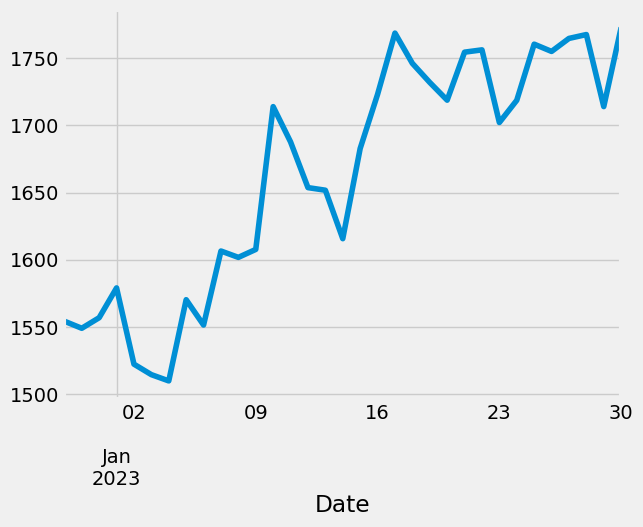

datetime64[ns]
            year  day_of_week  quarter  day  month   prediction
Date                                                           
2022-12-29  2022            3        4   29     12  1554.292969
2022-12-30  2022            4        4   30     12  1549.016846
2022-12-31  2022            5        4   31     12  1556.884277
2023-01-01  2023            6        1    1      1  1579.041504
2023-01-02  2023            0        1    2      1  1522.330811
2023-01-03  2023            1        1    3      1  1514.531128
2023-01-04  2023            2        1    4      1  1509.874756
2023-01-05  2023            3        1    5      1  1570.278564
2023-01-06  2023            4        1    6      1  1551.421265
2023-01-07  2023            5        1    7      1  1606.487671


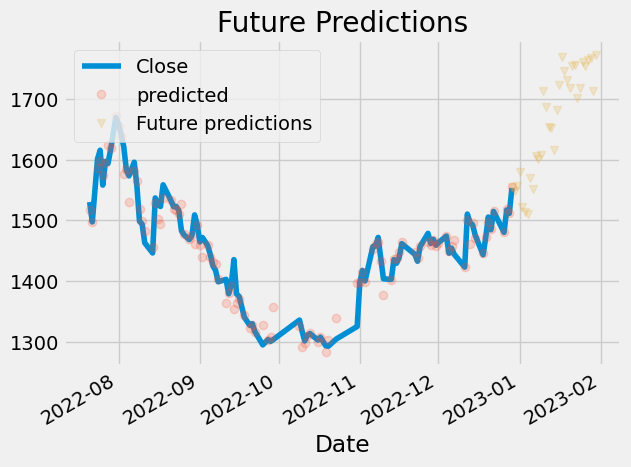

In [28]:
#print(codewriter('Others','OTHERS'))
Others_df = pd.read_excel('OTHERS.xlsx',parse_dates=True,skiprows=1,index_col='Date')
Others_df = Others_df[['Close']]
Others_df_n = create_features(Others_df)
X_Others=Others_df_n.drop('Close',axis=1)
y_Others=Others_df_n['Close']
X_Others_train,X_Others_test,y_Others_train,y_Others_test = train_test_split(X_Others,y_Others,test_size=0.3,random_state=s)
reg_XGB_Others=xgb.XGBRegressor(n_estimator=1000,early_stoping_rounds=50)
reg_RF_Others=RandomForestRegressor()
reg_XGB_Others.fit(X_Others_train,y_Others_train)
reg_RF_Others.fit(X_Others_train,y_Others_train)
y_pred_xgb=reg_XGB.predict(X_Others_test)
y_pred_RF=reg_RF.predict(X_Others_test)
print('The score for XGBoost is {}'.format(reg_XGB.score(X_Others_test,y_Others_test)))
print('The score for RandomForest is {}'.format(reg_RF.score(X_Others_test,y_Others_test)))

predictor_con_Others=pd.DataFrame({'Date':pd.Series(dtype='datetime64[ns]')})
predictor_con_Others['Date']=np.arange(datetime.datetime(2022, 12,29),datetime.datetime(2023, 1,31), datetime.timedelta(days=1))
predictor_con_Others['year']=predictor_con_Others.Date.dt.year
predictor_con_Others['day_of_week']=predictor_con_Others.Date.dt.dayofweek
predictor_con_Others['quarter']=predictor_con_Others.Date.dt.quarter
predictor_con_Others['day']=predictor_con_Others.Date.dt.day
predictor_con_Others['month']=predictor_con_Others.Date.dt.month
predictor_con.index=pd.to_datetime(predictor_con.index)
#predictor_con_Others_features= create_features(predictor_con_Others)
predictor_con_Others.set_index('Date',drop=True,inplace=True)
print(predictor_con_Others.head())
predictor_con_Others['prediction']=reg_XGB_Others.predict(predictor_con_Others.copy())
predictor_con_Others['prediction'].plot()
plt.show()
print(predictor_con_Others.index.dtype)
print(predictor_con_Others.head(10))


Others_df_n['prediction']=reg_XGB_Others.predict(X_Others)
zoomed_Others_df1=Others_df_n[(Others_df_n.index >'7-20-2022') & (Others_df_n.index <= '12-29-2022')]
fig,ax = plt.subplots()
zoomed_Others_df1['Close'].plot(ax=ax)
zoomed_Others_df1['prediction'].plot(style='o',ax=ax,alpha=0.2,label='predicted')
predictor_con_Others['prediction'].plot(style='v',ax=ax,alpha=0.2,label='Future predictions')
plt.legend(loc='upper left')
plt.title("Future Predictions")
plt.show()
average_returns_indexes['Others'] = (sum(predictor_con_Others['prediction'])/len(predictor_con_Others['prediction']))/Others_df.iloc[0,0]

In [29]:
average_returns_indexes['NEPSE'] = (sum(predictor_con['prediction'])/len(predictor_con['prediction']))/df.iloc[0,0]
print(average_returns_indexes)

{'banking': 1.3581001000086719, 'development_bank': 1.0567052087674929, 'finance': 1.1301018047400853, 'hotels_and_tourism': 1.0341012106894716, 'hydropower': 1.1125973759144947, 'life_insurance': 1.475663987648969, 'non_life_insurance': 1.4686387339943976, 'microfinance': 1.179416676526128, 'investment': 1.424894956291803, 'Others': 1.0533127532829965, 'NEPSE': 1.0076009131868877}


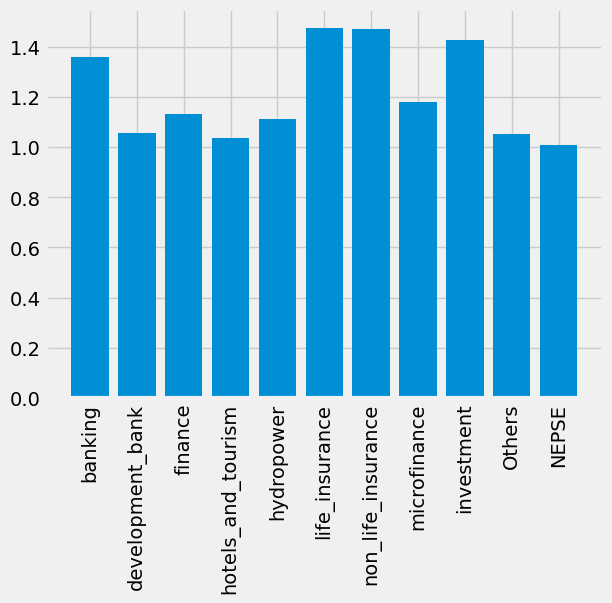

In [30]:
names = list(average_returns_indexes.keys())
values = list(average_returns_indexes.values())
plt.bar(range(len(average_returns_indexes)), values, tick_label=names)
plt.xticks(rotation=90)
plt.show()

# Stocks

SSHL : -577,
NTC : -9.58,
NMB : -88.23,
HDL : 0.35.

[09:55:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "early_stoping_rounds", "n_estimator" } are not used.

The score for XGBoost is -580.518813751257
The score for RandomForest is -579.9271839778484
            year  day_of_week  quarter  day  month
Date                                              
2022-12-29  2022            3        4   29     12
2022-12-30  2022            4        4   30     12
2022-12-31  2022            5        4   31     12
2023-01-01  2023            6        1    1      1
2023-01-02  2023            0        1    2      1


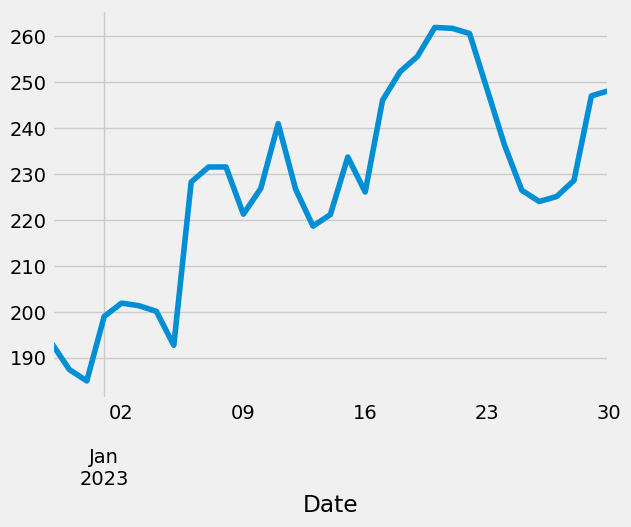

datetime64[ns]
            year  day_of_week  quarter  day  month  prediction
Date                                                          
2022-12-29  2022            3        4   29     12  193.046249
2022-12-30  2022            4        4   30     12  187.406265
2022-12-31  2022            5        4   31     12  184.949326
2023-01-01  2023            6        1    1      1  198.979675
2023-01-02  2023            0        1    2      1  201.895096
2023-01-03  2023            1        1    3      1  201.321381
2023-01-04  2023            2        1    4      1  200.089767
2023-01-05  2023            3        1    5      1  192.709991
2023-01-06  2023            4        1    6      1  228.252808
2023-01-07  2023            5        1    7      1  231.525665


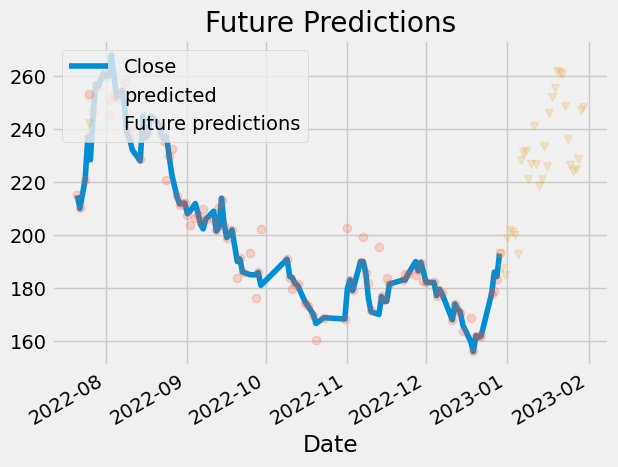

In [31]:
#print(codewriter('sshl','SSHL'))
sshl_df = pd.read_excel('SSHL.xlsx',parse_dates=True,skiprows=1,index_col='Date')
sshl_df = sshl_df[['Close']]
sshl_df_n = create_features(sshl_df)
X_sshl=sshl_df_n.drop('Close',axis=1)
y_sshl=sshl_df_n['Close']
X_sshl_train,X_sshl_test,y_sshl_train,y_sshl_test = train_test_split(X_sshl,y_sshl,test_size=0.3, random_state=s)
reg_XGB_sshl=xgb.XGBRegressor(n_estimator=1000,early_stoping_rounds=50)
reg_RF_sshl=RandomForestRegressor(random_state=s)
reg_XGB_sshl.fit(X_sshl_train,y_sshl_train)
reg_RF_sshl.fit(X_sshl_train,y_sshl_train)
y_pred_xgb=reg_XGB.predict(X_sshl_test)
y_pred_RF=reg_RF.predict(X_sshl_test)
print('The score for XGBoost is {}'.format(reg_XGB.score(X_sshl_test,y_sshl_test)))
print('The score for RandomForest is {}'.format(reg_RF.score(X_sshl_test,y_sshl_test)))

predictor_con_sshl=pd.DataFrame({'Date':pd.Series(dtype='datetime64[ns]')})
predictor_con_sshl['Date']=np.arange(datetime.datetime(2022, 12,29),datetime.datetime(2023, 1,31), datetime.timedelta(days=1))
predictor_con_sshl['year']=predictor_con_sshl.Date.dt.year
predictor_con_sshl['day_of_week']=predictor_con_sshl.Date.dt.dayofweek
predictor_con_sshl['quarter']=predictor_con_sshl.Date.dt.quarter
predictor_con_sshl['day']=predictor_con_sshl.Date.dt.day
predictor_con_sshl['month']=predictor_con_sshl.Date.dt.month
predictor_con.index=pd.to_datetime(predictor_con.index)
#predictor_con_sshl_features= create_features(predictor_con_sshl)
predictor_con_sshl.set_index('Date',drop=True,inplace=True)
print(predictor_con_sshl.head())
predictor_con_sshl['prediction']=reg_XGB_sshl.predict(predictor_con_sshl.copy())
predictor_con_sshl['prediction'].plot()
plt.show()
print(predictor_con_sshl.index.dtype)
print(predictor_con_sshl.head(10))


sshl_df_n['prediction']=reg_XGB_sshl.predict(X_sshl)
zoomed_sshl_df1=sshl_df_n[(sshl_df_n.index >'7-20-2022') & (sshl_df_n.index <= '12-29-2022')]
fig,ax = plt.subplots()
zoomed_sshl_df1['Close'].plot(ax=ax)
zoomed_sshl_df1['prediction'].plot(style='o',ax=ax,alpha=0.2,label='predicted')
predictor_con_sshl['prediction'].plot(style='v',ax=ax,alpha=0.2,label='Future predictions')
plt.legend(loc='upper left')
plt.title("Future Predictions")
plt.show()
average_returns_indexes['sshl'] = (sum(predictor_con_sshl['prediction'])/len(predictor_con_sshl['prediction']))/sshl_df.iloc[0,0]

[09:55:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "early_stoping_rounds", "n_estimator" } are not used.

The score for XGBoost is -9.299979918619844
The score for RandomForest is -9.321645302353307
            year  day_of_week  quarter  day  month
Date                                              
2022-12-29  2022            3        4   29     12
2022-12-30  2022            4        4   30     12
2022-12-31  2022            5        4   31     12
2023-01-01  2023            6        1    1      1
2023-01-02  2023            0        1    2      1


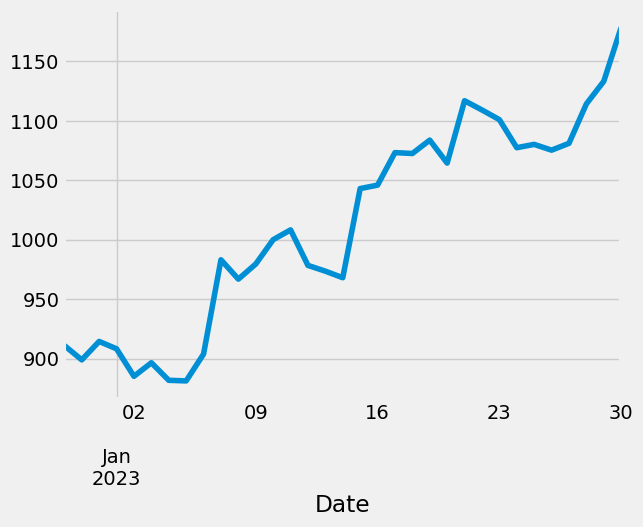

datetime64[ns]
            year  day_of_week  quarter  day  month  prediction
Date                                                          
2022-12-29  2022            3        4   29     12  911.006348
2022-12-30  2022            4        4   30     12  898.908386
2022-12-31  2022            5        4   31     12  914.428589
2023-01-01  2023            6        1    1      1  908.211792
2023-01-02  2023            0        1    2      1  885.088684
2023-01-03  2023            1        1    3      1  896.480103
2023-01-04  2023            2        1    4      1  881.732666
2023-01-05  2023            3        1    5      1  881.222778
2023-01-06  2023            4        1    6      1  903.828186
2023-01-07  2023            5        1    7      1  983.112610


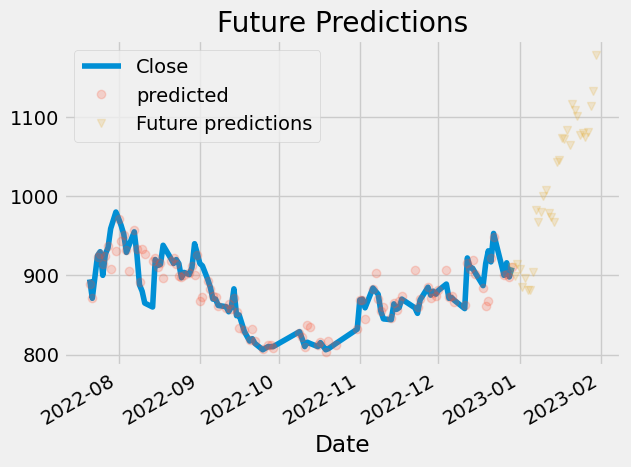

In [32]:
#print(codewriter('ntc','NTC'))
ntc_df = pd.read_excel('NTC.xlsx',parse_dates=True,skiprows=1,index_col='Date')
ntc_df = ntc_df[['Close']]
ntc_df_n = create_features(ntc_df)
X_ntc=ntc_df_n.drop('Close',axis=1)
y_ntc=ntc_df_n['Close']
X_ntc_train,X_ntc_test,y_ntc_train,y_ntc_test = train_test_split(X_ntc,y_ntc,test_size=0.3)
reg_XGB_ntc=xgb.XGBRegressor(n_estimator=1000,early_stoping_rounds=50)
reg_RF_ntc=RandomForestRegressor()
reg_XGB_ntc.fit(X_ntc_train,y_ntc_train)
reg_RF_ntc.fit(X_ntc_train,y_ntc_train)
y_pred_xgb=reg_XGB.predict(X_ntc_test)
y_pred_RF=reg_RF.predict(X_ntc_test)
print('The score for XGBoost is {}'.format(reg_XGB.score(X_ntc_test,y_ntc_test)))
print('The score for RandomForest is {}'.format(reg_RF.score(X_ntc_test,y_ntc_test)))

predictor_con_ntc=pd.DataFrame({'Date':pd.Series(dtype='datetime64[ns]')})
predictor_con_ntc['Date']=np.arange(datetime.datetime(2022, 12,29),datetime.datetime(2023, 1,31), datetime.timedelta(days=1))
predictor_con_ntc['year']=predictor_con_ntc.Date.dt.year
predictor_con_ntc['day_of_week']=predictor_con_ntc.Date.dt.dayofweek
predictor_con_ntc['quarter']=predictor_con_ntc.Date.dt.quarter
predictor_con_ntc['day']=predictor_con_ntc.Date.dt.day
predictor_con_ntc['month']=predictor_con_ntc.Date.dt.month
predictor_con.index=pd.to_datetime(predictor_con.index)
#predictor_con_ntc_features= create_features(predictor_con_ntc)
predictor_con_ntc.set_index('Date',drop=True,inplace=True)
print(predictor_con_ntc.head())
predictor_con_ntc['prediction']=reg_XGB_ntc.predict(predictor_con_ntc.copy())
predictor_con_ntc['prediction'].plot()
plt.show()
print(predictor_con_ntc.index.dtype)
print(predictor_con_ntc.head(10))


ntc_df_n['prediction']=reg_XGB_ntc.predict(X_ntc)
zoomed_ntc_df1=ntc_df_n[(ntc_df_n.index >'7-20-2022') & (ntc_df_n.index <= '12-29-2022')]
fig,ax = plt.subplots()
zoomed_ntc_df1['Close'].plot(ax=ax)
zoomed_ntc_df1['prediction'].plot(style='o',ax=ax,alpha=0.2,label='predicted')
predictor_con_ntc['prediction'].plot(style='v',ax=ax,alpha=0.2,label='Future predictions')
plt.legend(loc='upper left')
plt.title("Future Predictions")
plt.show()
average_returns_indexes['ntc'] = (sum(predictor_con_ntc['prediction'])/len(predictor_con_ntc['prediction']))/ntc_df.iloc[0,0]

[09:55:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "early_stoping_rounds", "n_estimator" } are not used.

The score for XGBoost is -83.03795615674389
The score for RandomForest is -82.99666383287997
            year  day_of_week  quarter  day  month
Date                                              
2022-12-29  2022            3        4   29     12
2022-12-30  2022            4        4   30     12
2022-12-31  2022            5        4   31     12
2023-01-01  2023            6        1    1      1
2023-01-02  2023            0        1    2      1


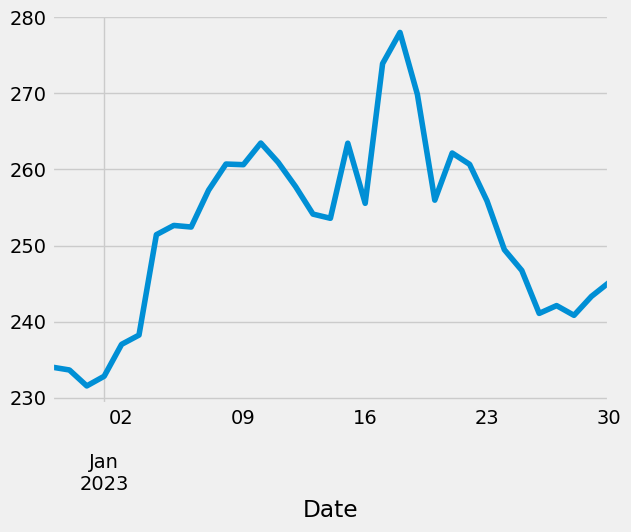

datetime64[ns]
            year  day_of_week  quarter  day  month  prediction
Date                                                          
2022-12-29  2022            3        4   29     12  234.016876
2022-12-30  2022            4        4   30     12  233.643524
2022-12-31  2022            5        4   31     12  231.548828
2023-01-01  2023            6        1    1      1  232.820496
2023-01-02  2023            0        1    2      1  237.010376
2023-01-03  2023            1        1    3      1  238.228806
2023-01-04  2023            2        1    4      1  251.426727
2023-01-05  2023            3        1    5      1  252.640610
2023-01-06  2023            4        1    6      1  252.432693
2023-01-07  2023            5        1    7      1  257.272003
2023-01-08  2023            6        1    8      1  260.711182
2023-01-09  2023            0        1    9      1  260.626343
2023-01-10  2023            1        1   10      1  263.473602
2023-01-11  2023            2        1  

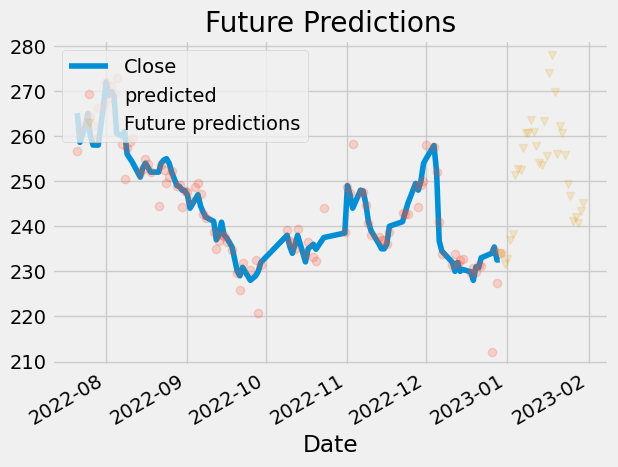

,year,day_of_week,quarter,day,month
Date,,,,,
2023-01-08,2023,6,1,8,1


In [33]:
#print(codewriter('nmb','NMB'))
nmb_df = pd.read_excel('NMB.xlsx',parse_dates=True,skiprows=1,index_col='Date')
nmb_df = nmb_df[['Close']]
nmb_df_n = create_features(nmb_df)
X_nmb=nmb_df_n.drop('Close',axis=1)
y_nmb=nmb_df_n['Close']
X_nmb_train,X_nmb_test,y_nmb_train,y_nmb_test = train_test_split(X_nmb,y_nmb,test_size=0.3)
reg_XGB_nmb=xgb.XGBRegressor(n_estimator=1000,early_stoping_rounds=50)
reg_RF_nmb=RandomForestRegressor()
reg_XGB_nmb.fit(X_nmb_train,y_nmb_train)
reg_RF_nmb.fit(X_nmb_train,y_nmb_train)
y_pred_xgb=reg_XGB.predict(X_nmb_test)
y_pred_RF=reg_RF.predict(X_nmb_test)
print('The score for XGBoost is {}'.format(reg_XGB.score(X_nmb_test,y_nmb_test)))
print('The score for RandomForest is {}'.format(reg_RF.score(X_nmb_test,y_nmb_test)))

predictor_con_nmb=pd.DataFrame({'Date':pd.Series(dtype='datetime64[ns]')})
predictor_con_nmb['Date']=np.arange(datetime.datetime(2022, 12,29),datetime.datetime(2023, 1,31), datetime.timedelta(days=1))
predictor_con_nmb['year']=predictor_con_nmb.Date.dt.year
predictor_con_nmb['day_of_week']=predictor_con_nmb.Date.dt.dayofweek
predictor_con_nmb['quarter']=predictor_con_nmb.Date.dt.quarter
predictor_con_nmb['day']=predictor_con_nmb.Date.dt.day
predictor_con_nmb['month']=predictor_con_nmb.Date.dt.month
predictor_con.index=pd.to_datetime(predictor_con.index)
#predictor_con_nmb_features= create_features(predictor_con_nmb)
predictor_con_nmb.set_index('Date',drop=True,inplace=True)
print(predictor_con_nmb.head())
fr_lp_pr = predictor_con_nmb.copy()
fr_lp_pr = fr_lp_pr[fr_lp_pr.index == '2023-01-08']
predictor_con_nmb['prediction']=reg_XGB_nmb.predict(predictor_con_nmb.copy())
predictor_con_nmb['prediction'].plot()
plt.show()
print(predictor_con_nmb.index.dtype)
print(predictor_con_nmb.head(30))


nmb_df_n['prediction']=reg_XGB_nmb.predict(X_nmb)
zoomed_nmb_df1=nmb_df_n[(nmb_df_n.index >'7-20-2022') & (nmb_df_n.index <= '12-29-2022')]
fig,ax = plt.subplots()
zoomed_nmb_df1['Close'].plot(ax=ax)
zoomed_nmb_df1['prediction'].plot(style='o',ax=ax,alpha=0.2,label='predicted')
predictor_con_nmb['prediction'].plot(style='v',ax=ax,alpha=0.2,label='Future predictions')
plt.legend(loc='upper left')
plt.title("Future Predictions")
plt.show()
average_returns_indexes['nmb'] = (sum(predictor_con_nmb['prediction'])/len(predictor_con_nmb['prediction']))/nmb_df.iloc[0,0]
nmb_lst=[]
fr_lp_pr.head()
#for i in range(10000):
#    nmb_lst.append(reg_XGB_nmb.predict(fr_lp_pr.copy()))
#nmb_np = np.array(nmb_lst)
#print("The average of 10000 predicition for 2023-01-08 NMB price is",sum(nmb_lst)/len(nmb_lst))    

In [34]:
#print(np.median(nmb_np))
#np.mean(nmb_np)

[09:55:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "early_stoping_rounds", "n_estimator" } are not used.

The score for XGBoost is 0.38082362097724276
The score for RandomForest is 0.38253690236643856
            year  day_of_week  quarter  day  month
Date                                              
2022-12-29  2022            3        4   29     12
2022-12-30  2022            4        4   30     12
2022-12-31  2022            5        4   31     12
2023-01-01  2023            6        1    1      1
2023-01-02  2023            0        1    2      1


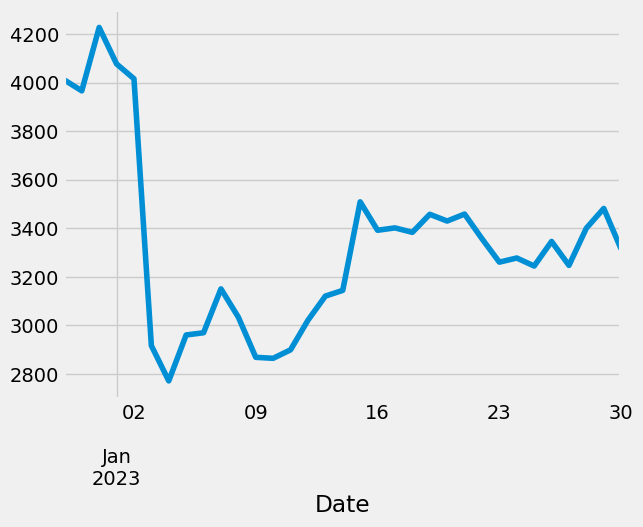

datetime64[ns]
            year  day_of_week  quarter  day  month   prediction
Date                                                           
2022-12-29  2022            3        4   29     12  4010.854492
2022-12-30  2022            4        4   30     12  3966.128174
2022-12-31  2022            5        4   31     12  4227.060059
2023-01-01  2023            6        1    1      1  4076.925537
2023-01-02  2023            0        1    2      1  4015.918701
2023-01-03  2023            1        1    3      1  2917.131104
2023-01-04  2023            2        1    4      1  2771.834961
2023-01-05  2023            3        1    5      1  2961.015137
2023-01-06  2023            4        1    6      1  2970.079346
2023-01-07  2023            5        1    7      1  3150.781494


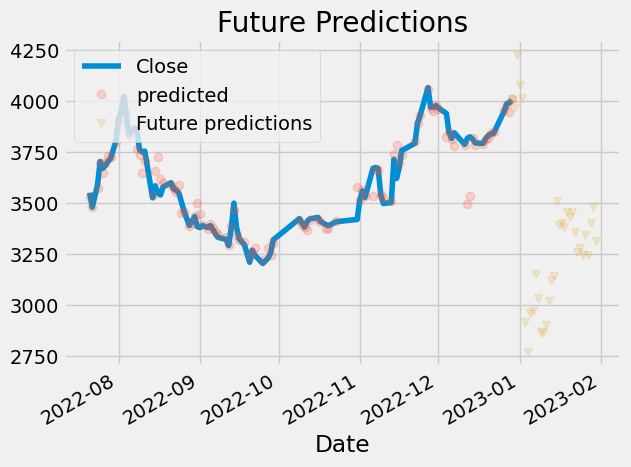

In [35]:
#print(codewriter('hdl','HDL'))
hdl_df = pd.read_excel('HDL.xlsx',parse_dates=True,index_col='Date')
hdl_df = hdl_df[['Close']]
hdl_df_n = create_features(hdl_df)
X_hdl=hdl_df_n.drop('Close',axis=1)
y_hdl=hdl_df_n['Close']
X_hdl_train,X_hdl_test,y_hdl_train,y_hdl_test = train_test_split(X_hdl,y_hdl,test_size=0.3)
reg_XGB_hdl=xgb.XGBRegressor(n_estimator=1000,early_stoping_rounds=50)
reg_RF_hdl=RandomForestRegressor()
reg_XGB_hdl.fit(X_hdl_train,y_hdl_train)
reg_RF_hdl.fit(X_hdl_train,y_hdl_train)
y_pred_xgb=reg_XGB.predict(X_hdl_test)
y_pred_RF=reg_RF.predict(X_hdl_test)
print('The score for XGBoost is {}'.format(reg_XGB.score(X_hdl_test,y_hdl_test)))
print('The score for RandomForest is {}'.format(reg_RF.score(X_hdl_test,y_hdl_test)))

predictor_con_hdl=pd.DataFrame({'Date':pd.Series(dtype='datetime64[ns]')})
predictor_con_hdl['Date']=np.arange(datetime.datetime(2022, 12,29),datetime.datetime(2023, 1,31), datetime.timedelta(days=1))
predictor_con_hdl['year']=predictor_con_hdl.Date.dt.year
predictor_con_hdl['day_of_week']=predictor_con_hdl.Date.dt.dayofweek
predictor_con_hdl['quarter']=predictor_con_hdl.Date.dt.quarter
predictor_con_hdl['day']=predictor_con_hdl.Date.dt.day
predictor_con_hdl['month']=predictor_con_hdl.Date.dt.month
predictor_con.index=pd.to_datetime(predictor_con.index)
#predictor_con_hdl_features= create_features(predictor_con_hdl)
predictor_con_hdl.set_index('Date',drop=True,inplace=True)
print(predictor_con_hdl.head())
predictor_con_hdl['prediction']=reg_XGB_hdl.predict(predictor_con_hdl.copy())
predictor_con_hdl['prediction'].plot()
plt.show()
print(predictor_con_hdl.index.dtype)
print(predictor_con_hdl.head(10))


hdl_df_n['prediction']=reg_XGB_hdl.predict(X_hdl)
zoomed_hdl_df1=hdl_df_n[(hdl_df_n.index >'7-20-2022') & (hdl_df_n.index <= '12-29-2022')]
fig,ax = plt.subplots()
zoomed_hdl_df1['Close'].plot(ax=ax)
zoomed_hdl_df1['prediction'].plot(style='o',ax=ax,alpha=0.2,label='predicted')
predictor_con_hdl['prediction'].plot(style='v',ax=ax,alpha=0.2,label='Future predictions')
plt.legend(loc='upper left')
plt.title("Future Predictions")
plt.show()
average_returns_indexes['hdl'] = (sum(predictor_con_hdl['prediction'])/len(predictor_con_hdl['prediction']))/hdl_df.iloc[0,0]

## ADBL

[09:55:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "early_stoping_rounds", "n_estimator" } are not used.

The score for XGBoost is -62.99385602160585
The score for RandomForest is -62.855887584576806
            year  day_of_week  quarter  day  month
Date                                              
2023-02-01  2023            2        1    1      2
2023-02-02  2023            3        1    2      2
2023-02-03  2023            4        1    3      2
2023-02-04  2023            5        1    4      2
2023-02-05  2023            6        1    5      2


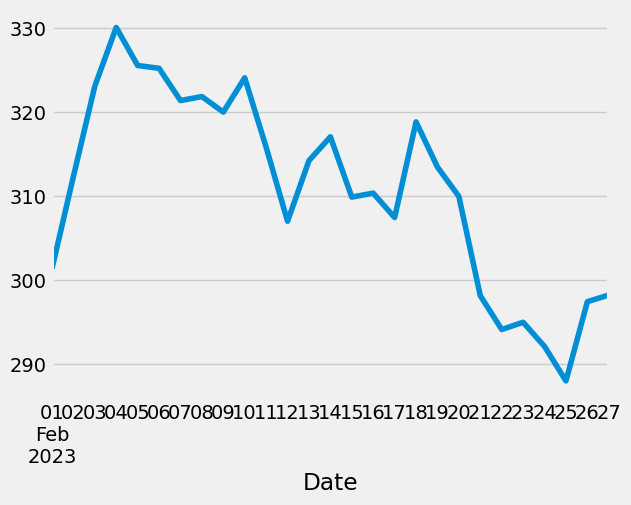

datetime64[ns]
            year  day_of_week  quarter  day  month  prediction
Date                                                          
2023-02-01  2023            2        1    1      2  301.395325
2023-02-02  2023            3        1    2      2  312.360168
2023-02-03  2023            4        1    3      2  323.117096
2023-02-04  2023            5        1    4      2  330.097595
2023-02-05  2023            6        1    5      2  325.572815
2023-02-06  2023            0        1    6      2  325.234955
2023-02-07  2023            1        1    7      2  321.400574
2023-02-08  2023            2        1    8      2  321.873535
2023-02-09  2023            3        1    9      2  320.027466
2023-02-10  2023            4        1   10      2  324.108917


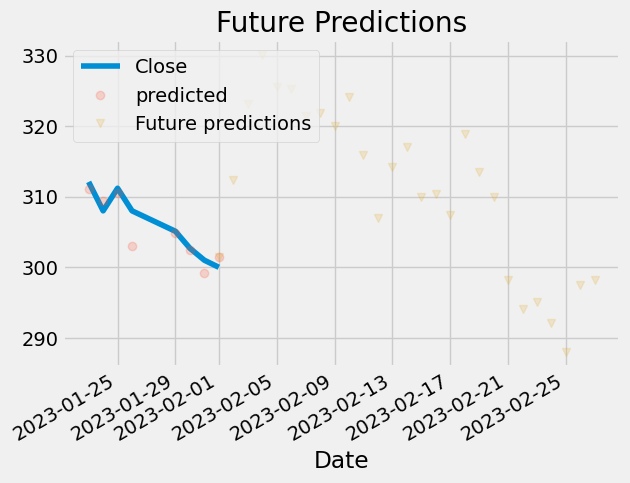

In [36]:
#print(codewriter('adbl','ADBL'))
adbl_df = pd.read_excel('ADBL.xlsx',parse_dates=True,skiprows=1,index_col='Date')
adbl_df = adbl_df[['Close']]
adbl_df_n = create_features(adbl_df)
X_adbl=adbl_df_n.drop('Close',axis=1)
y_adbl=adbl_df_n['Close']
X_adbl_train,X_adbl_test,y_adbl_train,y_adbl_test = train_test_split(X_adbl,y_adbl,test_size=0.3)
reg_XGB_adbl=xgb.XGBRegressor(n_estimator=1000,early_stoping_rounds=50)
reg_RF_adbl=RandomForestRegressor()
reg_XGB_adbl.fit(X_adbl_train,y_adbl_train)
reg_RF_adbl.fit(X_adbl_train,y_adbl_train)
y_pred_xgb=reg_XGB.predict(X_adbl_test)
y_pred_RF=reg_RF.predict(X_adbl_test)
print('The score for XGBoost is {}'.format(reg_XGB.score(X_adbl_test,y_adbl_test)))
print('The score for RandomForest is {}'.format(reg_RF.score(X_adbl_test,y_adbl_test)))

predictor_con_adbl=pd.DataFrame({'Date':pd.Series(dtype='datetime64[ns]')})
predictor_con_adbl['Date']=np.arange(datetime.datetime(2023, 2,1),datetime.datetime(2023, 2,28), datetime.timedelta(days=1))
predictor_con_adbl['year']=predictor_con_adbl.Date.dt.year
predictor_con_adbl['day_of_week']=predictor_con_adbl.Date.dt.dayofweek
predictor_con_adbl['quarter']=predictor_con_adbl.Date.dt.quarter
predictor_con_adbl['day']=predictor_con_adbl.Date.dt.day
predictor_con_adbl['month']=predictor_con_adbl.Date.dt.month
predictor_con.index=pd.to_datetime(predictor_con.index)
#predictor_con_adbl_features= create_features(predictor_con_adbl)
predictor_con_adbl.set_index('Date',drop=True,inplace=True)
print(predictor_con_adbl.head())
predictor_con_adbl['prediction']=reg_XGB_adbl.predict(predictor_con_adbl.copy())
predictor_con_adbl['prediction'].plot()
plt.show()
print(predictor_con_adbl.index.dtype)
print(predictor_con_adbl.head(10))


adbl_df_n['prediction']=reg_XGB_adbl.predict(X_adbl)
zoomed_adbl_df1=adbl_df_n[(adbl_df_n.index >'1-20-2023')]
fig,ax = plt.subplots()
zoomed_adbl_df1['Close'].plot(ax=ax)
zoomed_adbl_df1['prediction'].plot(style='o',ax=ax,alpha=0.2,label='predicted')
predictor_con_adbl['prediction'].plot(style='v',ax=ax,alpha=0.2,label='Future predictions')
plt.legend(loc='upper left')
plt.title("Future Predictions")
plt.show()
average_returns_indexes['adbl'] = (sum(predictor_con_adbl['prediction'])/len(predictor_con_adbl['prediction']))/adbl_df.iloc[0,0]